# Book Rating ML prediction project

## Project Description
#### Book Rating Prediction Model

“There is no friend as loyal as a book.” - Ernest Hemingway
Nowadays with so many books available, it can be hard to select the best ones to read. The
dataset provided is a curation of Goodreads books based on real user information. It can be
used for many tasks like predicting a book’s rating or recommending new books.
Below is the information you have regarding the dataset attributes:


### Dataset attributes
There are 12 variables:
- bookID: A unique identification number for each book.
- title: The name under which the book was published.
- authors: The names of the authors of the book. Multiple authors are delimited by “/”.
- average_rating: The average rating of the book received in total.
- isbn: Another unique number to identify the book, known as the International Standard Book Number.
- isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
- language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.
- num_pages: The number of pages the book contains.
- ratings_count: The total number of ratings the book received.
- text_reviews_count: The total number of written text reviews the book received.
- publication_date: The date the book was published.
- publisher: The name of the book publisher.

In [1]:
!pip install wordcloud

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import re #step 9 of cleaning stage
import matplotlib.pyplot as plt # analysis stage
import seaborn as sns # analysis stage
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# read the original dataset and the one from Google API 
dataset = pd.read_csv("books.csv", encoding='UTF-8',on_bad_lines='skip')
dataset2 = pd.read_csv("books-open-book.csv", encoding='UTF-8',on_bad_lines='skip')

In [4]:
# make a copy of dataframe to keep both in memory
df1 = dataset.copy() # use a copy in order to not modifying the original df
df2 = dataset2.copy()

In [5]:
df2.shape

(11123, 9)

In [6]:
# merging of df1 & df2 in cdf (complete dataframe)
cdf = pd.merge(df1, df2, left_on="isbn", right_on="ISBN", how='inner')

In [7]:
# inspect shape of the dataframe
cdf.shape

(11123, 21)

## Preliminary Data Cleaning
###### Dealing with missing values
- fill NA in Title with value in column title
- fill NA in Author with value in column authors
- fill NA in Publishing_Date with value in column publication_date

In [8]:
cdf.isna().sum()

bookID                   0
title                    0
authors                  0
average_rating           0
isbn                     0
isbn13                   0
language_code            0
  num_pages              0
ratings_count            0
text_reviews_count       0
publication_date         0
publisher                0
Unnamed: 0               0
ISBN                     0
Title                   21
Author                 107
Publishing_Date        158
Subject_list           752
Subject_places        6595
Subject_people        8131
Description           8369
dtype: int64

In [9]:
# Fill ‘Title’ con ‘title’ della stessa row

cdf.loc[(cdf["Title"].isna()) & (~cdf["title"].isna()), "Title"] = \
cdf[(cdf["Title"].isna()) & (~cdf["title"].isna())]["title"]

In [10]:
# Fill ‘Author’ con 'authors' della stessa row

cdf.loc[(cdf["Author"].isna()) & (~cdf["authors"].isna()), "Author"] = \
cdf[(cdf["Author"].isna()) & (~cdf["authors"].isna())]["authors"]

In [11]:
# Fill ‘Publishing_Date’ con 'publication_date' della stessa row

cdf.loc[(cdf["Publishing_Date"].isna()) & (~cdf["publication_date"].isna()), "Publishing_Date"] = \
cdf[(cdf["Publishing_Date"].isna()) & (~cdf["publication_date"].isna())]["publication_date"]

In [12]:
# Fill ‘Subject_list’ con ‘Description’ della stessa row

cdf.loc[(cdf["Subject_list"].isna()) & (~cdf["Description"].isna()), "Description"] = \
cdf[(cdf["Subject_list"].isna()) & (~cdf["Description"].isna())]["Subject_list"]

In [13]:
# Fill ‘Subject_list’ con ‘Subject_people’ della stessa row

cdf.loc[(cdf["Subject_list"].isna()) & (~cdf["Subject_people"].isna()), "Subject_people"] = \
cdf[(cdf["Subject_list"].isna()) & (~cdf["Subject_people"].isna())]["Subject_list"]

In [14]:
cdf.isna().sum()

bookID                   0
title                    0
authors                  0
average_rating           0
isbn                     0
isbn13                   0
language_code            0
  num_pages              0
ratings_count            0
text_reviews_count       0
publication_date         0
publisher                0
Unnamed: 0               0
ISBN                     0
Title                    0
Author                   0
Publishing_Date          0
Subject_list           752
Subject_places        6595
Subject_people        8144
Description           8439
dtype: int64

In [15]:
cdf['Subject_list'].value_counts().sum()

10371

In [16]:
cdf['Subject_list']=cdf['Subject_list'].str.lower()

In [17]:
cdf['Subject_list'] = cdf['Subject_list'].fillna(value='not specified')

In [18]:
bool_serie= (cdf['Subject_list'].str.contains(r'fanta'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

1168

In [19]:
cdf.loc[bool_serie,'Subject_list' ] = 'fantasy'

In [20]:
bool_serie= (cdf['Subject_list'].str.contains(r'comic|graphic|strip|manga'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

533

In [21]:
cdf.loc[bool_serie,'Subject_list' ] = 'comics'

In [22]:
bool_serie= (cdf['Subject_list'].str.contains(r'histo|war|evolu|civiliz'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

2555

In [23]:
cdf.loc[bool_serie,'Subject_list' ] = 'historical'

In [24]:
bool_serie= (cdf['Subject_list'].str.contains(r'autob|biogr|memoi|life|intervie|memor'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

1291

In [25]:
cdf.loc[bool_serie,'Subject_list' ] = 'autobiography-biography'

In [26]:
bool_serie= (cdf['Subject_list'].str.contains(r'social|polit|critic|psich|mental|think|psych|imper|democ'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

874

In [27]:
cdf.loc[bool_serie,'Subject_list' ] = 'social-political'

In [28]:
bool_serie= (cdf['Subject_list'].str.contains(r'relig|philos|spirit|bibl|koran|christ|god|cult|will|immort|plato|church|musl|angel|ethic|theol|doctr|devot|faith|evang'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

475

In [29]:
cdf.loc[bool_serie,'Subject_list' ] = 'religious-philosophical'

In [30]:
bool_serie= (cdf['Subject_list'].str.contains(r'theat|play|poet|musical|music|sound'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

252

In [31]:
cdf.loc[bool_serie,'Subject_list' ] = 'poetry-theatre-music'

In [32]:
bool_serie= (cdf['Subject_list'].str.contains(r'dram'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

92

In [33]:
cdf.loc[bool_serie,'Subject_list' ] = 'drama'

In [34]:
bool_serie= (cdf['Subject_list'].str.contains(r'fabl|fair'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

32

In [35]:
cdf.loc[bool_serie,'Subject_list' ] = 'fable-fairytale'

In [36]:
bool_serie= (cdf['Subject_list'].str.contains(r'myth|folk'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

34

In [37]:
cdf.loc[bool_serie,'Subject_list' ] = 'mithology-folklore'

In [38]:
bool_serie= (cdf['Subject_list'].str.contains(r'acti|adven'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

177

In [39]:
cdf.loc[bool_serie,'Subject_list' ] = 'action-adventure'

In [40]:
bool_serie= (cdf['Subject_list'].str.contains(r'myste|crime|detectiv|murd'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

488

In [41]:
cdf.loc[bool_serie,'Subject_list' ] = 'mystery'

In [42]:
bool_serie= (cdf['Subject_list'].str.contains(r'romanc|love|coupl|romant|passio'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

230

In [43]:
cdf.loc[bool_serie,'Subject_list' ] = 'romance'

In [44]:
bool_serie= (cdf['Subject_list'].str.contains(r'horr|thrill|suspen'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

183

In [45]:
cdf.loc[bool_serie,'Subject_list' ] = 'horror-thriller'

In [46]:
bool_serie= (cdf['Subject_list'].str.contains(r'fiction'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

1196

In [47]:
cdf.loc[bool_serie,'Subject_list' ] = 'fiction'

In [48]:
bool_serie= (cdf['Subject_list'].str.contains(r'essay'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

25

In [49]:
cdf.loc[bool_serie,'Subject_list' ] = 'essay'

In [50]:
bool_serie= (cdf['Subject_list'].str.contains(r'guide|how'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

27

In [51]:
cdf.loc[bool_serie,'Subject_list' ] = 'guidebook'

In [52]:
bool_serie= (cdf['Subject_list'].str.contains(r'game|pok|card'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

19

In [53]:
cdf.loc[bool_serie,'Subject_list' ] = 'games'

In [54]:
bool_serie= (cdf['Subject_list'].str.contains(r'science|medic|physic|prevent|drug|stud|analy|math|algeb|calc|ology|enginee|statis|theor|stat'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

179

In [55]:
cdf.loc[bool_serie,'Subject_list' ] = 'science-medicine'

In [56]:
bool_serie= (cdf['Subject_list'].str.contains(r'comedy|humour|synt|hum'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

32

In [57]:
cdf.loc[bool_serie,'Subject_list' ] = 'humour'

In [58]:
bool_serie= (cdf['Subject_list'].str.contains(r'art|craft|phot|paint|pict|portr|colour|draw|creat|aest|design|patch|visual|color'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

94

In [59]:
cdf.loc[bool_serie,'Subject_list' ] = 'art'

In [60]:
bool_serie= (cdf['Subject_list'].str.contains(r'econo|busine|manag|market|buy|law|finan|sell'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

51

In [61]:
cdf.loc[bool_serie,'Subject_list' ] = 'business-economy'

In [62]:
bool_serie= (cdf['Subject_list'].str.contains(r'languag|grammat|synt|liter|tradu|diction|encyc|transl'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

88

In [63]:
cdf.loc[bool_serie,'Subject_list' ] = 'language'

In [64]:
bool_serie= (cdf['Subject_list'].str.contains(r'letter|corresp|aphor'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

12

In [65]:
cdf.loc[bool_serie,'Subject_list' ] = 'language'

In [66]:
bool_serie= (cdf['Subject_list'].str.contains(r'animal|natur|dog|fauna|pet|beast|green|geo|plant|garde|organic|flowe'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

13

In [67]:
cdf.loc[bool_serie,'Subject_list' ] = 'nature-animals'

In [68]:
bool_serie= (cdf['Subject_list'].str.contains(r'novel|story|narrat|stor|auth'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

2578

In [69]:
cdf.loc[bool_serie,'Subject_list' ] = 'novel-narrative'

In [70]:
bool_serie= (cdf['Subject_list'].str.contains(r'short'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

0

In [71]:
cdf.loc[bool_serie,'Subject_list' ] = 'short-story'

In [72]:
bool_serie= (cdf['Subject_list'].str.contains(r'trave|vojag|car|bicy|bike'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

25

In [73]:
cdf.loc[bool_serie,'Subject_list' ] = 'travel'

In [74]:
bool_serie= (cdf['Subject_list'].str.contains(r'cook|food|eat|wine|bever|drink'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

312

In [75]:
cdf.loc[bool_serie,'Subject_list' ] = 'food'

In [76]:
bool_serie= (cdf['Subject_list'].str.contains(r'mind|body|consci|medit|diet|grow|achie|goal|sport|healt'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

11

In [77]:
cdf.loc[bool_serie,'Subject_list' ] = 'mind-meditation'

In [78]:
bool_serie= (cdf['Subject_list'].str.contains(r'woman|sex|wif|wiv|child|matern|women|relation'))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

14

In [79]:
cdf.loc[bool_serie,'Subject_list' ] = 'woman'

In [80]:
#last group 'mixed' for those whose genre couln't be classified
bool_serie = (~cdf["Subject_list"].str.contains('|'.join(['novel-narrative','autobiography-biography','fiction','fantasy','social-political','not specified','comics','mystery','religious-philosophical','food','romance','horror-thriller','action-adventure','language','drama','science-medicine','art','business-economy','humour','mithology-folklore','fable-fairytale','travel','guidebook','nature-animals','essay','games','mind-meditation','woman'] )))
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().head(200)

series:fullmetal_alchemist                                                                                                                  8
old time radio,sherlock holmes                                                                                                              2
collectionid:stmisc                                                                                                                         2
new york times reviewed                                                                                                                     2
accessible book                                                                                                                             1
parishes                                                                                                                                    1
antisemitism                                                                                                                                1
shaman

In [81]:
cdf.loc[bool_serie,'Subject_list' ] = 'mixed'

In [82]:
cdf['Subject_list'].value_counts().head(60)  #752 missing 'not specified', 152 'mixed'

novel-narrative            2578
autobiography-biography    1291
fiction                    1196
fantasy                    1168
social-political            874
not specified               752
comics                      533
mystery                     488
religious-philosophical     475
food                        312
romance                     230
horror-thriller             183
science-medicine            179
action-adventure            177
mixed                       152
language                    100
art                          94
drama                        92
business-economy             51
fable-fairytale              32
humour                       32
guidebook                    27
travel                       25
essay                        25
games                        19
woman                        14
nature-animals               13
mind-meditation              11
Name: Subject_list, dtype: int64

In [83]:
np.size(cdf['Subject_list'].unique()) #28 genres for Subject_list

28

In [84]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11122
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  Unnamed: 0          11123 non-null  int64  
 13  ISBN                11123 non-null  object 
 14  Title               11123 non-null  object 
 15  Author              11123 non-null  object 
 16  Publ

In [85]:
#now repeat to fill 'not specified' in the column 'Subject_list'. Using the str.contains of before we look for those strings in the title and then assign the subject list

In [86]:
cdf['title']=cdf['title'].str.lower()

In [87]:
bool_serie= (cdf['title'].str.contains(r'fanta')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

2

In [88]:
cdf.loc[bool_serie,'Subject_list'] = 'fantasy'

In [89]:
bool_serie= (cdf['title'].str.contains(r'comic|graphic|strip|manga')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

3

In [90]:
cdf.loc[bool_serie,'Subject_list' ] = 'comics'

In [91]:
bool_serie= (cdf['title'].str.contains(r'histo|war|evolu|civiliz')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

37

In [92]:
cdf.loc[bool_serie,'Subject_list' ] = 'historical'

In [93]:
bool_serie= (cdf['title'].str.contains(r'autob|biogr|memoi|life|intervie|memor')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

10

In [94]:
cdf.loc[bool_serie,'Subject_list' ] = 'autobiography-biography'

In [95]:
bool_serie= (cdf['title'].str.contains(r'social|polit|critic|psich|mental|think|psych|imper|democ')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

5

In [96]:
cdf.loc[bool_serie,'Subject_list' ] = 'social-political'

In [97]:
bool_serie= (cdf['title'].str.contains(r'relig|philos|spirit|bibl|koran|christ|god|cult|will|immort|plato|church|musl|angel|ethic|theol|doctr|devot|faith|evang'))  & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

23

In [98]:
cdf.loc[bool_serie,'Subject_list' ] = 'religious-philosophical'

In [99]:
bool_serie= (cdf['title'].str.contains(r'theat|play|poet|musical|music|sound')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

15

In [100]:
cdf.loc[bool_serie,'Subject_list' ] = 'poetry-theatre-music'

In [101]:
bool_serie= (cdf['title'].str.contains(r'dram')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

1

In [102]:
cdf.loc[bool_serie,'Subject_list' ] = 'drama'

In [103]:
bool_serie= (cdf['title'].str.contains(r'fabl|fair')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

3

In [104]:
cdf.loc[bool_serie,'Subject_list' ] = 'fable-fairytale'

In [105]:
bool_serie= (cdf['title'].str.contains(r'myth|folk')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

2

In [106]:
cdf.loc[bool_serie,'Subject_list' ] = 'mithology-folklore'

In [107]:
bool_serie= (cdf['title'].str.contains(r'acti|adven')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['Subject_list'].value_counts().sum()

19

In [108]:
cdf.loc[bool_serie,'Subject_list' ] = 'action-adventure'

In [109]:
bool_serie= (cdf['title'].str.contains(r'myste|crime|detectiv|murd')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

11

In [110]:
cdf.loc[bool_serie,'Subject_list' ] = 'mystery'

In [111]:
bool_serie= (cdf['title'].str.contains(r'romanc|love|coupl|romant|passio')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

8

In [112]:
cdf.loc[bool_serie,'Subject_list' ] = 'romance'

In [113]:
bool_serie= (cdf['title'].str.contains(r'horr|thrill|suspen')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

2

In [114]:
cdf.loc[bool_serie,'Subject_list' ] = 'horror-thriller'

In [115]:
bool_serie= (cdf['title'].str.contains(r'fiction')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

0

In [116]:
cdf.loc[bool_serie,'Subject_list' ] = 'fiction'

In [117]:
bool_serie= (cdf['title'].str.contains(r'essay')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

1

In [118]:
cdf.loc[bool_serie,'Subject_list' ] = 'essay'

In [119]:
bool_serie= (cdf['title'].str.contains(r'guide|how')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

12

In [120]:
cdf.loc[bool_serie,'Subject_list' ] = 'guidebook'

In [121]:
bool_serie= (cdf['title'].str.contains(r'game|pok|card')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

5

In [122]:
cdf.loc[bool_serie,'Subject_list' ] = 'games'

In [123]:
bool_serie= (cdf['title'].str.contains(r'science|medic|physic|prevent|drug|stud|analy|math|algeb|calc|ology|enginee|statis|theor|stat')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

7

In [124]:
cdf.loc[bool_serie,'Subject_list' ] = 'science-medicine'

In [125]:
bool_serie= (cdf['title'].str.contains(r'comedy|humour|synt|hum')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

1

In [126]:
cdf.loc[bool_serie,'Subject_list' ] = 'humour'

In [127]:
bool_serie= (cdf['title'].str.contains(r'art|craft|phot|paint|pict|portr|colour|draw|creat|aest|design|patch|visual|color')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

22

In [128]:
cdf.loc[bool_serie,'Subject_list' ] = 'art'

In [129]:
bool_serie= (cdf['title'].str.contains(r'econo|busine|manag|market|buy|law|finan|sell')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

0

In [130]:
cdf.loc[bool_serie,'Subject_list' ] = 'business-economy'

In [131]:
bool_serie= (cdf['title'].str.contains(r'languag|grammat|synt|liter|tradu|diction|encyc|transl')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

4

In [132]:
cdf.loc[bool_serie,'Subject_list' ] = 'language'

In [133]:
bool_serie= (cdf['title'].str.contains(r'letter|corresp|aphor')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

0

In [134]:
cdf.loc[bool_serie,'Subject_list' ] = 'language'

In [135]:
bool_serie= (cdf['title'].str.contains(r'animal|natur|dog|fauna|pet|beast|green|geo|plant|garde|organic|flowe')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

16

In [136]:
cdf.loc[bool_serie,'Subject_list' ] = 'nature-animals'

In [137]:
bool_serie= (cdf['title'].str.contains(r'novel|story|narrat|stor|auth')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

23

In [138]:
cdf.loc[bool_serie,'Subject_list' ] = 'novel-narrative'

In [139]:
bool_serie= (cdf['title'].str.contains(r'short')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

0

In [140]:
cdf.loc[bool_serie,'Subject_list' ] = 'short-story'

In [141]:
bool_serie= (cdf['title'].str.contains(r'trave|vojag|car|bicy|bike')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

4

In [142]:
cdf.loc[bool_serie,'Subject_list' ] = 'travel'

In [143]:
bool_serie= (cdf['title'].str.contains(r'cook|food|eat|wine|bever|drink')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

11

In [144]:
cdf.loc[bool_serie,'Subject_list' ] = 'food'

In [145]:
bool_serie= (cdf['title'].str.contains(r'mind|body|consci|medit|diet|grow|achie|goal|sport|healt')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

3

In [146]:
cdf.loc[bool_serie,'Subject_list' ] = 'mind-meditation'

In [147]:
bool_serie= (cdf['title'].str.contains(r'woman|sex|wif|wiv|child|matern|women|relation')) & (cdf['Subject_list'] == 'not specified')
df_Other=cdf.loc[bool_serie,:]
df_Other['title'].value_counts().sum()

6

In [148]:
cdf.loc[bool_serie,'Subject_list' ] = 'woman'

In [149]:
cdf['Subject_list'].value_counts().head(60)  # before 752 missing 'not specified' now 496, 152 'mixed'
# something is not working because also other value change (not only not specified)

novel-narrative            2601
autobiography-biography    1301
fiction                    1196
fantasy                    1170
social-political            879
comics                      536
mystery                     499
religious-philosophical     498
not specified               496
food                        323
romance                     238
action-adventure            196
science-medicine            186
horror-thriller             185
mixed                       152
art                         116
language                    104
drama                        93
business-economy             51
guidebook                    39
historical                   37
fable-fairytale              35
humour                       33
travel                       29
nature-animals               29
essay                        26
games                        24
woman                        20
poetry-theatre-music         15
mind-meditation              14
mithology-folklore            2
Name: Su

In [150]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11122
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  Unnamed: 0          11123 non-null  int64  
 13  ISBN                11123 non-null  object 
 14  Title               11123 non-null  object 
 15  Author              11123 non-null  object 
 16  Publ

In [151]:
#dropping columns that are not useful
cdf = cdf.drop(['Subject_places','Subject_people','Description', 'ISBN','Unnamed: 0'], axis=1)
#keep Title, Author, Publidhing_date do compare it with title, authors and publication_date

###### Check column names and unify text as lowercase
- Rename columns correctly, everything lowercase and without blank spaces

In [152]:
cdf.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'Title', 'Author', 'Publishing_Date', 'Subject_list'], dtype='object')

In [153]:
# removing the blank spaces in the num_pages column name
newcols = {'  num_pages': 'num_pages', 'Subject_list':'genre', 'Title':'title2','Author':'author2','Publishing_Date':'publication_date2'}
df = cdf.rename(columns=newcols) #now we will be using df to indicate the complete dataset

In [154]:
# convert all the columns to small case
df.columns = map(str.lower, df.columns)
df.columns

Index(['bookid', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'title2', 'author2', 'publication_date2', 'genre'], dtype='object')

In [155]:
# convert every string in lowercase except for isbn since it is an identifier
df['title']=df['title'].str.lower()
df['authors']=df['authors'].str.lower()
df['language_code']=df['language_code'].str.lower()
df['publisher']=df['publisher'].str.lower()
df['genre']=df['genre'].str.lower()
df['title2']=df['title2'].str.lower()
df['author2']=df['author2'].str.lower()

In [156]:
# show Dataframe size (rows, columns)
df.shape  

# We have 11123 records with 17 columns

(11123, 16)

In [157]:
df.isna().sum()
# no more missing values

bookid                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
title2                0
author2               0
publication_date2     0
genre                 0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11122
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookid              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  title2              11123 non-null  object 
 13  author2             11123 non-null  object 
 14  publication_date2   11123 non-null  object 
 15  genre               11123 non-null  object 
dtypes: f

###### Check datatypes
- Correct data types

In [159]:
# show column datatypes
df.dtypes
# data types seem coherent, publication_date is assimilated as object but can be transformed into date type and same for publication_date2

bookid                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
title2                 object
author2                object
publication_date2      object
genre                  object
dtype: object

In [160]:
df['publication_date'].head()
# month, day, year format date

0    9/16/2006
1     9/1/2004
2    11/1/2003
3     5/1/2004
4    9/13/2004
Name: publication_date, dtype: object

In [161]:
df['publication_date1'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors="coerce")
# errors = 'coerce' because some days cant't be formatted

In [162]:
# find how many rows present the issue
df['publication_date1'].isna().sum()

2

In [163]:
# display the rows rows which present the issue
df[['publication_date', 'publication_date1']][df['publication_date1'].isna()]

,publication_date,publication_date1
8177,11/31/2000,NaT
11094,6/31/1982,NaT


In [164]:
# June and November have 30 days but here the day is set to 31 which should be impossible, we change it in 3oth
df.at[8177,'publication_date']='11/30/2000'
df.at[11094,'publication_date']= '6/30/1982'

In [165]:
# check if the error comes up again and do the datatype transformation on the original column, solved
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y')

In [166]:
# drop the 'publication_date1' column since it is not useful anymore
df = df.drop('publication_date1', axis=1)

In [167]:
df['publication_date2'].head(20)
# month, day, year but many have just the year and the month is a string so drop column is the best solution

0                2006-09
1                2004-09
2           Nov 01, 2003
3      September 1, 2014
4        October 1, 2004
5         April 26, 2005
6        October 1, 2005
7                   2005
8                   1996
9                   2004
10          Mar 29, 2005
11                  1996
12                  2004
13                  2002
14                  2002
15                  2001
16          June 6, 2000
17    September 12, 1990
18                  1992
19                  2001
Name: publication_date2, dtype: object

In [168]:
# dropping the meaningless column
df = df.drop(['publication_date2'], axis=1)

In [169]:
df.dtypes

bookid                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
title2                        object
author2                       object
genre                         object
dtype: object

In [170]:
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre
0,1,harry potter and the half-blood prince (harry ...,j.k. rowling/mary grandpré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,scholastic inc.,harry potter and the half-blood prince,j. k. rowling,fantasy
1,2,harry potter and the order of the phoenix (har...,j.k. rowling/mary grandpré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,scholastic inc.,harry potter and the order of the phoenix,j. k. rowling,fantasy
2,4,harry potter and the chamber of secrets (harry...,j.k. rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,scholastic,harry potter and the chamber of secrets,j. k. rowling,fantasy
3,5,harry potter and the prisoner of azkaban (harr...,j.k. rowling/mary grandpré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,scholastic inc.,harry potter and the prisoner of azkaban,j. k. rowling,fantasy
4,8,harry potter boxed set books 1-5 (harry potte...,j.k. rowling/mary grandpré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,scholastic,harry potter paperback boxed set (books 1-5),j. k. rowling,fantasy


In [171]:
# show Dataframe size (rows, columns)
df.shape  

# Now we have 11123 records with 16 columns

(11123, 15)

## Analysis of the dataset

main problems of the original dataset:
- 1 column has some spaces before the name - SOLVED in preliminary cleaning
- wrong datatype for publication_date - SOLVED in preliminary cleaning
- duplicates in the title
- many rows have many values = 0 (particularly num_pages, ratings_count, text_reviews, average_rating)
- different values in num_pages, ratings_count, text_reviews, average_rating for the same title 
- many authors are stored in the 'authors' column
- no information on the genre - SOLVED in preliminary cleaning

what we can get from the original dataset dataset:
- new binary variable multiple_authors to indicate whether the book was written by more than 1 author
- new variable n_authors to indicate how many authors wrote the book
- from publication_date we extract the season and century
- from average_rating, ratings_count, text_reviews, num_page we create categories
- TO DO - rates like n_authors vs avg n_authors or avg_ratings vs avg_average_rating
- TO DO - new variable 'total_reviews' that sums values from ratings_count and text_reviews

main problems of the new dataset:
- many missing values for all the columns except ISBN - SOLVED in preliminary cleaning
- publishing_date does not present the complete date, it is not in date format - SOLVED in preliminary cleaning

what we can get from the new dataset dataset:
- information on the genre
- possibility to compare title, author

In [172]:
# we start describing the dataset dividing the columns in 2 groups numerical and categorical

In [173]:
df.columns

Index(['bookid', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'title2', 'author2', 'genre'], dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11122
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  title2              11123 non-null  object        
 13  author2             11123 non-null  object    

In [175]:
# List of numerical column names
numerical = ['bookid', 'average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date']

# List of categorical column names
categorical = ['title', 'authors', 'isbn', 'language_code', 'publisher', 'title2', 'author2', 'genre']

In [176]:
# describing columns with categorical values (not considering title since it is just identifier)
df[categorical].describe().round(2)
# We observe some redundancy in titles (10311 unique) (10066 for title2)
# We observe some redundancy in Authors (6639 unique) (4356 for author2), Stephen King has the most works (40)
# We observe 27 unique languages, with eng books dominating the dataset (8908)
# There are 2262 unique publishers with vintage being the most common (318 works)
# We have 31 unique genres among which novel-narrative is the most popular

,title,authors,isbn,language_code,publisher,title2,author2,genre
count,11123,11123,11123,11123,11123,11123,11123,11123
unique,10311,6639,11123,27,2262,10066,4356,31
top,the iliad,stephen king,0439785960,eng,vintage,three complete novels,william shakespeare,novel-narrative
freq,9,40,1,8908,318,10,89,2601


In [177]:
# describing columns with numerical values (not considering bookid, isbn, isbn13 since they are just identifiers)
df[numerical].describe().round(2)
# look at the min row there are many variables with value=0 go deep to find if that brings bad consequences to our dataset
# Average Rating mean is 3.93, 25% is 3.77, median is 3.96, 75% is 4.14. Ratings are mostly high and spread is small (std : 0.35). Skewness seems low
# num_pages mean is 336 vs median 299, exhibits some skewness because of outliers (top 6576)
# ratings_count mean is 179942 vs median 7.45, exhibiting strong skewness as top value is > 4597666
# text_reviews_count mean is 542 vs median 47, exhibiting high skewness with a top value of 94265

,bookid,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.00,11123.00,1.112300e+04,11123.00,11123.00,11123.00
mean,21310.86,3.93,9.759880e+12,336.41,17942.85,542.05
std,13094.73,0.35,4.429758e+11,241.15,112499.15,2576.62
min,1.00,0.00,8.987060e+09,0.00,0.00,0.00
25%,10277.50,3.77,9.780345e+12,192.00,104.00,9.00
50%,20287.00,3.96,9.780582e+12,299.00,745.00,47.00
75%,32104.50,4.14,9.780872e+12,416.00,5000.50,238.00
max,45641.00,5.00,9.790008e+12,6576.00,4597666.00,94265.00


<Figure size 864x432 with 0 Axes>

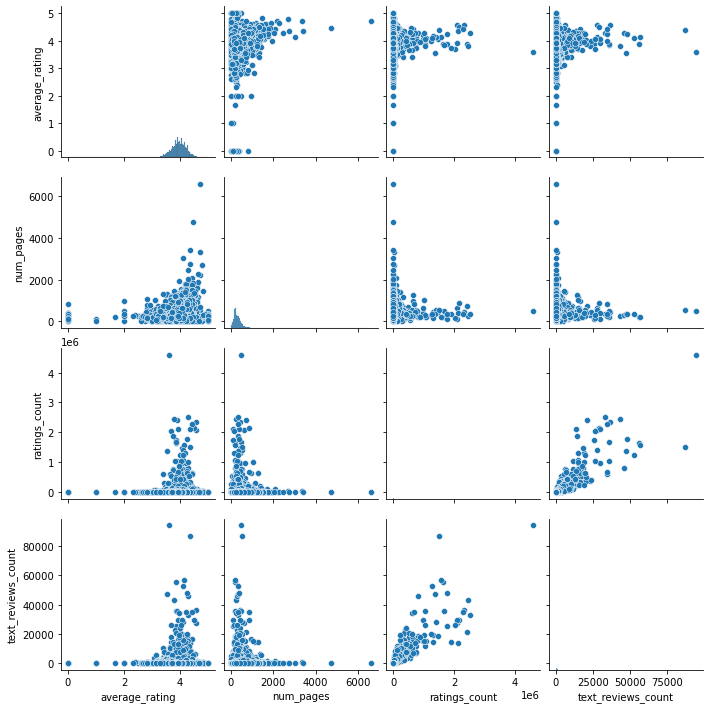

In [178]:
# creating the pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(df.drop(['isbn13','bookid'], axis=1))

# Visualizing the pairwise relationships between multiple numerical variables (average rating, num pages, ratings count, text reviews count)

<Figure size 1800x576 with 0 Axes>

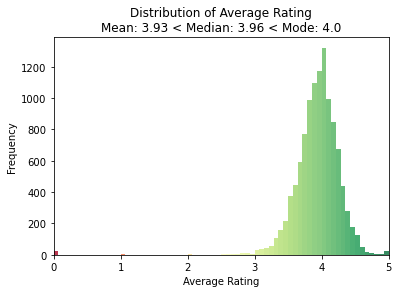

In [179]:
# Histogram to plot the distribution of average_ratings with color of the bars changing as the rate increases
# Define the number of bins and the gradient colors
n_bins = 70
colors = sns.color_palette("RdYlGn", n_bins) #color palette that ranges from red to green depending on the bins

# Create the histogram and loop over the bins to set the color of each one
plt.figure(figsize=(25,8))
fig, ax = plt.subplots()
counts, bins, _ = ax.hist(x='average_rating',data=df, bins=n_bins, alpha=0.8)
for i in range(0, n_bins):
    ax.patches[i].set_fc(colors[i])
plt.xlim(0, 5) # set the x-axis limits to 0 and 5
mean_value = df['average_rating'].mean()
median_value = df['average_rating'].median()
mode_value = df['average_rating'].mode()
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating\nMean: {:.2f} < Median: {:.2f} < Mode: 4.0'.format(mean_value, median_value))
plt.show()

# Histogram with n_bins bins, where the color of the first bin is the first color in the "RdYlGn" palette, and the color of each subsequent bin is a gradient between red (low values) and green (high values).
# mean < median < mode Left Skewed Distribution

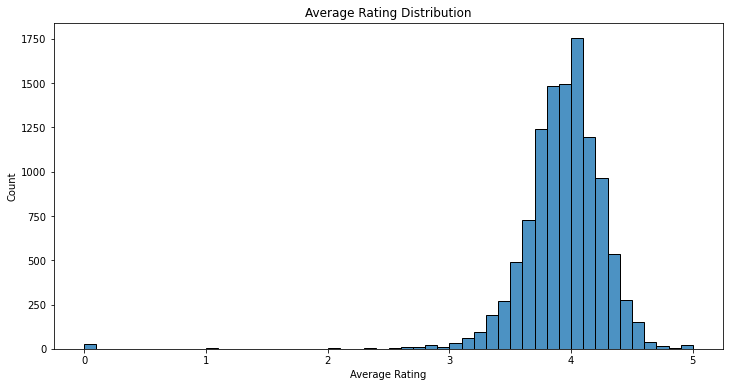

In [180]:
# Histogram to plot the distribution of average_ratings
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='average_rating', bins=50, palette='cool', alpha=0.8)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

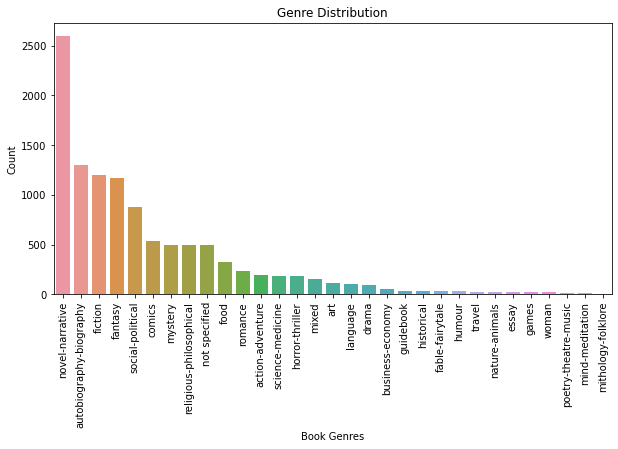

In [181]:
# Histogram to plot the distribution of the Genres
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=df,order = df['genre'].value_counts().index)
plt.title('Genre Distribution')
plt.ylabel('Count')
plt.xlabel('Book Genres')
plt.xticks(rotation=90)
plt.show()

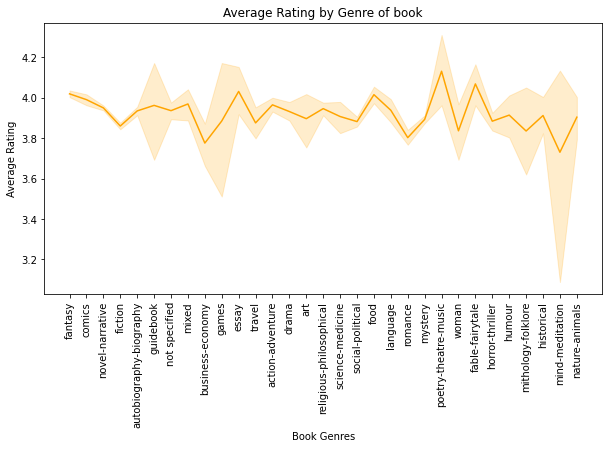

In [182]:
# Lineplot showing Average Rating by Genre
plt.figure(figsize=(10,5))
sns.lineplot(x='genre', y='average_rating', color="orange", data=df)
plt.title('Average Rating by Genre of book')
plt.ylabel('Average Rating')
plt.xlabel('Book Genres')
plt.xticks(rotation=90)
plt.show()


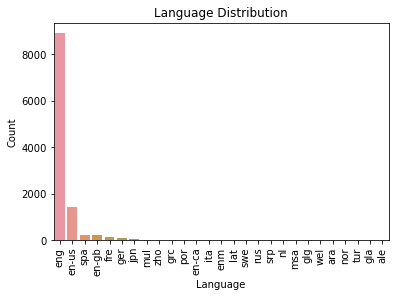

In [183]:
# segment average_rating by language
sns.countplot(x='language_code', data=df,order = df['language_code'].value_counts().index)
plt.title('Language Distribution')
plt.ylabel('Count')
plt.xlabel('Language')
plt.xticks(rotation=90)

plt.show()

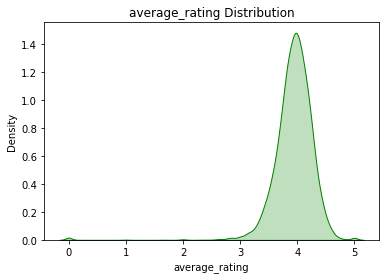

In [184]:
# segment by average_rating
sns.kdeplot(x='average_rating', data=df, color="green", fill=True)
plt.title('average_rating Distribution')
plt.show()


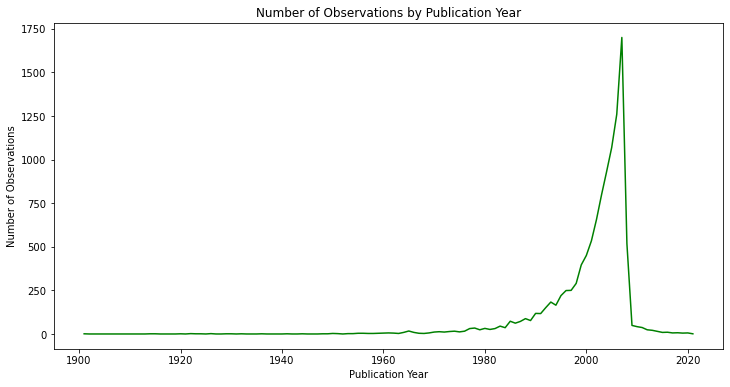

In [185]:
# Set the publication date column as the index
dftemp = df.set_index('publication_date')

# Resample the data to get the count of observations by year
count_by_year = dftemp.resample('Y').size() 

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(count_by_year.index, count_by_year.values, color='green')
plt.title('Number of Observations by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Observations')
plt.show()

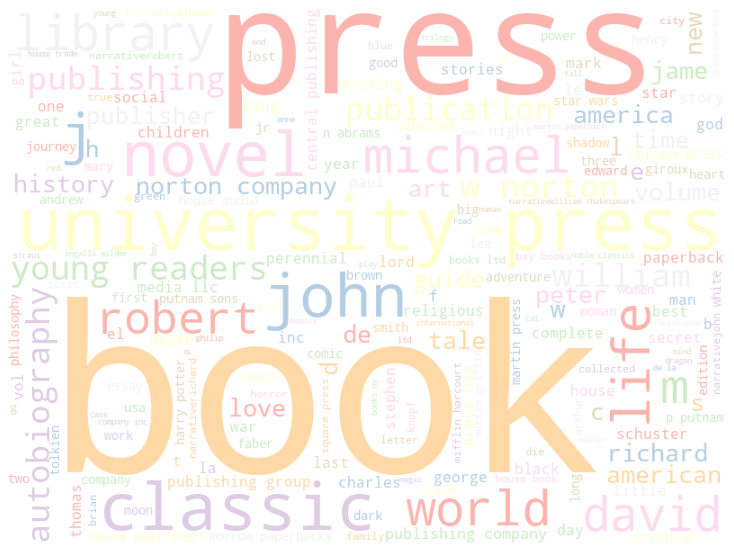

In [186]:
titles = df['title']
genres = df['genre']
authors = df['authors']
publishers = df['publisher']

text = ' '.join(titles+genres+authors+publishers)

stopwords = set(STOPWORDS)
stopwords.update(['ciao'])

wordcloud = WordCloud(width=800, height=600,background_color='white',
                     stopwords=stopwords, contour_width=2, contour_color = 'steelblue', 
                    colormap='Pastel1', random_state=42).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

## Cleaning Operations

### Data Cleaning & Transformation Stage
- 4. DONE - DATA CLEANING - Too many authors (until 51) -> Keep only the first author who is the writer 'main_author' (individuato perchè è scritto prima della ',')
- new col 'n_pages_vs_avg_aut' 
- new col 'n_pages_vs_avg_pub'
- new col 'rating_vs_avg_aut'
- new col 'rating_vs_avg_pub'
- 5. DONE - DATA CLEANING - Duplicates? - Common titles with different lines -> Keep the max value and add the number of votes
- 6. DONE - DATA CLEANING - Num pages with data 0 -> For 15 of them take the data of the identical book -> The rest, average by publisher
- 7. NO DISCREPANCY FOUND - DATA CLEANING - 4 lines discrepency between title and data -> Fix data with the right column	
- 8. DONE - DATA CLEANING - Publication date -> Split by year -> Split by season into numerical
- 9. DONE - DATA CLEANING - Language -> en-us, en-gb, eng tutti rinominati eng

###### Find the first author for each book
- 4. Keep just one author for each book (the first one) and store it in a new column; add binary variable for multiple authors and one variable that counts the number of authors in 'authors'

In [187]:
# New binary column for multiple authors (presence of more than 1 author in main author)
# Create a new column called 'multiple_authors'
df['multiple_authors'] = df['authors'].str.contains('/')

# Convert the boolean values in 'multiple_authors' to 1s and 0s
df['multiple_authors'] = df['multiple_authors'].astype(int)

In [188]:
# New column that counts the number of authors
df['n_authors'] = df['authors'].str.count('/') + 1
# or df['authors_list'].str.len()

In [189]:
# New column 'main_author' with the first author of each book (delimited with'/')
# We transform the authors string into a list of authors
df['authors_list'] = df['authors'].str.split('/')
# We get the main author
df['main_author'] = df['authors_list'].str[0]

In [190]:
# We check if there are invalid authors
display(df['main_author'].describe())
print(df[df['main_author'].isna()])

count                   11123
unique                   4215
top       william shakespeare
freq                       88
Name: main_author, dtype: object

Empty DataFrame
Columns: [bookid, title, authors, average_rating, isbn, isbn13, language_code, num_pages, ratings_count, text_reviews_count, publication_date, publisher, title2, author2, genre, multiple_authors, n_authors, authors_list, main_author]
Index: []


In [191]:
display(df['n_authors'].describe())
df['n_authors'].value_counts()

count    11123.000000
mean         1.729479
std          1.820111
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         51.000000
Name: n_authors, dtype: float64

1     6561
2     3078
3     1005
4      222
5       65
6       54
7       21
10      12
8       11
15      11
9       10
11       9
21       8
18       8
13       8
16       6
17       6
12       5
19       4
20       3
24       3
23       2
14       1
26       1
27       1
28       1
51       1
35       1
33       1
38       1
22       1
25       1
32       1
Name: n_authors, dtype: int64

In [192]:
df.info() #check for no Missing Values and to see if the right columns have been dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11122
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  title2              11123 non-null  object        
 13  author2             11123 non-null  object    

In [193]:
df[['authors','main_author','n_authors','multiple_authors']].sample(10) #checking if the new variables are doing what they are supposed to do

,authors,main_author,n_authors,multiple_authors
4079,herman wouk,herman wouk,1,0
6802,winston s. churchill/john keegan,winston s. churchill,2,1
2512,janice ross/allan ulrich/brigitte lefevre,janice ross,3,1
1235,nick hornby,nick hornby,1,0
6653,connie willis,connie willis,1,0
6447,david almond,david almond,1,0
665,ted dekker,ted dekker,1,0
3732,charles de lint,charles de lint,1,0
1679,v.s. naipaul,v.s. naipaul,1,0
7337,marshall sahlins,marshall sahlins,1,0


###### Inspect duplicates in the dataset
- 5. Keep 1 row for each unique title summing the info regarding rating, n. of pages, etc..

In [194]:
df['title'].duplicated().value_counts()

False    10311
True       812
Name: title, dtype: int64

In [195]:
df[['title', 'average_rating','ratings_count','text_reviews_count', 'num_pages']][df['title'].duplicated()]

,title,average_rating,ratings_count,text_reviews_count,num_pages
10,the hitchhiker's guide to the galaxy (hitchhik...,4.22,1266,253,6
24,the lord of the rings (the lord of the rings ...,4.50,1618,140,1216
37,the changeling,3.55,301,43,339
40,the known world,3.83,55,12,14
41,the known world,3.83,22,3,576
...,...,...,...,...,...
11076,artemis fowl (artemis fowl #1),3.84,55,14,6
11078,the subtle knife (his dark materials #2),4.13,677,77,326
11080,the subtle knife (his dark materials #2),4.13,39,8,8
11096,on the road,3.63,3271,342,307


In [196]:
df[['title', 'average_rating','ratings_count','text_reviews_count', 'num_pages']][df['title'].str.contains('harry potter and the prisoner of azkaban')]

,title,average_rating,ratings_count,text_reviews_count,num_pages
3,harry potter and the prisoner of azkaban (harr...,4.56,2339585,36325,435
1233,harry potter and the prisoner of azkaban (harr...,4.56,3141,140,480


In [197]:
# new updated column for ratings count that sums all ratings count when the title is the same
df['ratings_count_updt']=df.groupby(['title'])['ratings_count'].transform('sum')

In [198]:
# new updated column for text reviews count that sums all review count when the title is the same
df['text_reviews_count_updt']=df.groupby(['title'])['text_reviews_count'].transform('sum')

In [199]:
# useful for next stage regarding num pages, must be done before dropping duplicates
# new updated column for num_pages that store max value when the title is the same
# or mean instead of max?? sometimes looking at the Salem's lot book the max is 817, the min is 0, another 17
# the rest takes value from 405 to 594 and checking it online it should be smt between 439 and 670 depending on the version
df['max_pages']=df.groupby(['title'])['num_pages'].transform('max')

In [200]:
# check for title 'the known world'
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'num_pages', 'max_pages']][df['title']=='the known world']

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,num_pages,max_pages
39,the known world,3.83,29686,2626,30212,388,576
40,the known world,3.83,55,12,30212,14,576
41,the known world,3.83,22,3,30212,576,576
3193,the known world,3.83,449,83,30212,388,576


In [201]:
df[['title', 'average_rating','ratings_count','ratings_count_updt','text_reviews_count','publication_date','text_reviews_count_updt', 'num_pages', 'max_pages']][df['title'].str.contains('harry potter and the prisoner of azkaban')]

,title,average_rating,ratings_count,ratings_count_updt,text_reviews_count,publication_date,text_reviews_count_updt,num_pages,max_pages
3,harry potter and the prisoner of azkaban (harr...,4.56,2339585,2342726,36325,2004-05-01,36465,435,480
1233,harry potter and the prisoner of azkaban (harr...,4.56,3141,2342726,140,2008-07-01,36465,480,480


In [202]:
# check for title 'salem's lot
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'num_pages', 'max_pages']][df['title']=="'salem's lot"]

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,num_pages,max_pages
1572,'salem's lot,4.25,84123,571,85852,594,817
1573,'salem's lot,4.02,227,54,85852,17,817
1574,'salem's lot,4.02,1039,130,85852,405,817
1576,'salem's lot,4.02,178,35,85852,427,817
1577,'salem's lot,4.02,25,6,85852,586,817
5298,'salem's lot,4.02,56,5,85852,0,817
5300,'salem's lot,4.02,18,3,85852,817,817
9249,'salem's lot,4.02,186,22,85852,427,817


In [203]:
# check with the new columns
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'text_reviews_count_updt', 'num_pages', 'max_pages']][df['title'].duplicated()]

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,text_reviews_count_updt,num_pages,max_pages
10,the hitchhiker's guide to the galaxy (hitchhik...,4.22,1266,253,12107,1261,6,216
24,the lord of the rings (the lord of the rings ...,4.50,1618,140,4161,290,1216,1216
37,the changeling,3.55,301,43,1477,139,339,339
40,the known world,3.83,55,12,30212,2724,14,576
41,the known world,3.83,22,3,30212,2724,576,576
...,...,...,...,...,...,...,...,...
11076,artemis fowl (artemis fowl #1),3.84,55,14,528,41,6,286
11078,the subtle knife (his dark materials #2),4.13,677,77,5466,422,326,326
11080,the subtle knife (his dark materials #2),4.13,39,8,5466,422,8,326
11096,on the road,3.63,3271,342,9334,883,307,320


In [204]:
# now keep just the observation with max average_rating for each title

In [205]:
df = df.sort_values(['average_rating'], ascending=False).drop_duplicates(['title'],keep= 'first')

In [206]:
# check for title 'the known world'
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'num_pages', 'max_pages']][df['title']=='the known world']

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,num_pages,max_pages
40,the known world,3.83,55,12,30212,14,576


In [207]:
df['title'].duplicated().value_counts()

False    10311
Name: title, dtype: int64

In [208]:
df[['title', 'average_rating','ratings_count','ratings_count_updt','text_reviews_count','publication_date','text_reviews_count_updt', 'num_pages', 'max_pages']][df['title'].str.contains('harry potter and the prisoner of azkaban')]

,title,average_rating,ratings_count,ratings_count_updt,text_reviews_count,publication_date,text_reviews_count_updt,num_pages,max_pages
1233,harry potter and the prisoner of azkaban (harr...,4.56,3141,2342726,140,2008-07-01,36465,480,480


###### Deal with very low value of number of pages
- 6.1 Column max_pages created in previous step to fill the n.pages with the value found in another row with same book title (from 76 rows with num_page = 0 to 61)
- 6.2 Fill n.pages = 0 with average pages of the author (from 61 to 20)
- 6.3 Fill n.pages = 0 with average pages of the publisher (from 20 to 4)
- 6.4 Take the index of the rows with n.pages = 0 and assign the n. of pages found online (from 4 to 0)

###### Should we do the same operations for low num_page (<50) ?

In [209]:
# inspect how many rows have num pages=0
df.sort_values(by=['max_pages']).head(100)

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages
4973,17983,the reverse of the medal (aubrey/maturin #11),patrick o'brian/simon vance,4.41,0786178183,9780786178186,en-gb,0,3598,93,2006-02-01,blackstone audiobooks,the reverse of the medal,patrick o'brian,novel-narrative,1,2,"[patrick o'brian, simon vance]",patrick o'brian,3598,93,0
5866,22077,the michael crichton collection: jurassic park...,michael crichton/chris noth/anthony heald,4.29,0375415807,9780375415807,eng,0,107,3,2000-06-09,random house audio,michael crichton value collection (the michael...,michael crichton,not specified,1,3,"[michael crichton, chris noth, anthony heald]",michael crichton,107,3,0
5842,21934,dirty white boys,stephen hunter/will patten,4.05,1570421927,9781570421921,eng,0,1,1,2006-05-01,hachette audio,dirty white boys,stephen hunter,action-adventure,1,2,"[stephen hunter, will patten]",stephen hunter,1,1,0
4525,16313,a caribbean mystery,agatha christie/rosalind ayres,3.80,1572705493,9781572705494,eng,0,49,10,2006-10-09,audiogo,a caribbean mystery,agatha christie,religious-philosophical,1,2,"[agatha christie, rosalind ayres]",agatha christie,49,10,0
9119,35485,five rings of fire (able team #11),tom arnett/dick stivers/don pendleton,3.64,0373612117,9780373612116,eng,0,39,2,1984-02-23,gold eagle,five rings of fire,dick stivers,not specified,1,3,"[tom arnett, dick stivers, don pendleton]",tom arnett,39,2,0
3617,13106,the celestine prophecy,james redfield/lou diamond phillips,3.64,1594831955,9781594831959,en-us,0,64,10,2006-02-16,grand central publishing,the celestine prophecy,james redfield,novel-narrative,1,2,"[james redfield, lou diamond phillips]",james redfield,64,10,0
4368,15691,caligula and three other plays,albert camus,4.04,039440520X,9780394405209,fre,0,17,3,1966-05-01,knopf,"caligula, and three other plays",albert camus,drama,0,1,[albert camus],albert camus,17,3,0
9545,37911,shipwreck (island i),gordon korman/holter graham,3.80,0439023319,9780439023313,eng,0,103,14,2007-02-01,scholastic audio books,shipwreck,gordon korman,fiction,1,2,"[gordon korman, holter graham]",gordon korman,103,14,0
2732,10075,clockwork (cover to cover),philip pullman,3.87,185549695X,9781855496958,eng,0,24,1,2002-07-29,bbc audiobooks,clockwork (cover to cover),philip pullman,horror-thriller,0,1,[philip pullman],philip pullman,24,1,0
10188,41273,fine lines (one-eyed mack #6),jim lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,random house value publishing,fine lines,jim lehrer,not specified,0,1,[jim lehrer],jim lehrer,17,4,0


In [210]:
# subset with all obs where num pages = 0 using the new column max_pages created during point 5 before dropping duplicates
maxnopage = df[df['max_pages'] == 0]

In [211]:
maxnopage.shape # before adding column max_pages (76,15), then 61,16

(61, 22)

In [212]:
# compute average num_pages for each author and same for publisher

In [213]:
#see what's the average max number of pages for each author in main_author
avgnumpagexauth = df.groupby(["main_author"]).mean().max_pages 

In [214]:
avgnumpagexauth

main_author
a.b. yehoshua            416.000000
a.d.p. briggs            256.000000
a.e. cunningham          232.000000
a.j. jacobs              389.000000
a.m. homes               256.000000
                            ...    
zora neale hurston       426.600000
zoë heller               251.000000
åsne seierstad           291.333333
émile zola               459.444444
éric-emmanuel schmitt     85.000000
Name: max_pages, Length: 4188, dtype: float64

In [215]:
avgnumpagexauthDICT = df.groupby(["main_author"]).mean().num_pages.astype(int).to_dict()

In [216]:
avgnumpagexauthDICT.keys()

dict_keys(['a.b. yehoshua', 'a.d.p. briggs', 'a.e. cunningham', 'a.j. jacobs', 'a.m. homes', 'a.n. roquelaure', 'a.s. byatt', 'abbie hoffman', 'abdul rahman munif', 'abigail adams', 'abigail thomas', 'abolqasem ferdowsi', 'abraham lincoln', 'adam  sexton', 'adam drozdek', 'adam ginsberg', 'adam gopnik', 'adam hochschild', 'adam mansbach', 'adam rex', 'adam smith', 'adam swift', 'adam woog', 'adolfo bioy casares', 'adrian guelke', 'adrian mckinty', 'adèle geras', 'aeschylus', 'aesop', 'agatha christie', 'ai morinaga', 'aidan hartley', 'aimee bender', 'aimé césaire', 'akira yoshida', 'al franken', 'al gore', 'al ries', 'alain de botton', 'alan  lee', 'alan aldridge', 'alan brennert', 'alan cohen', 'alan dean foster', 'alan hausman', 'alan hollinghurst', 'alan lightman', 'alan macgillivray', 'alan moore', 'alan paton', 'alastair lamb', 'albert camus', 'albert demeo', 'albert einstein', 'albert ellis', 'albert jack', 'albert marrin', 'albert speer', 'alcoholics anonymous', 'alden t. vaugha

In [217]:
def numpage_guesser_auth(main_author): #guess average numpage based on author
    numpage = avgnumpagexauthDICT[main_author] 
    return numpage

In [218]:
numpage_guesser_auth('agatha christie')

249

In [219]:
#loop over every dictionary key 
# go to df locate the df with a certain author and all columns (store everything in a new df)
# get rows where max_numpage=0 and use the numpage guesser function to fill numpage= 0 
for main_author in avgnumpagexauthDICT.keys():
    temp_df = df.loc[(df.main_author==main_author),:]
    zero_values_index = temp_df.loc[(temp_df['max_pages'] == 0)].index
    df.loc[zero_values_index,"max_pages"] = numpage_guesser_auth(main_author)

In [220]:
df[df['max_pages'] == 0].shape #from 61 to 13

(13, 22)

In [221]:
#repeat for publisher

In [222]:
#see what's the average max number of pages for each publisher
avgnumpagexpubl = df.groupby(["publisher"]).mean().max_pages #seems that 

In [223]:
avgnumpagexpubl

publisher
10/18                            191.000000
1st book library                 600.000000
1st world library                387.000000
a & c black (childrens books)     62.000000
a harvest book/harcourt  inc.    216.000000
                                    ...    
聯經出版事業股份有限公司                     537.500000
英文漢聲出版股份有限公司                      36.000000
角川書店 (kadokawa shoten)           171.500000
講談社                              186.833333
集英社                              199.500000
Name: max_pages, Length: 2184, dtype: float64

In [224]:
avgnumpagexpublDICT = df.groupby(["publisher"]).mean().num_pages.astype(int).to_dict()

In [225]:
avgnumpagexpublDICT.keys()

dict_keys(['10/18', '1st book library', '1st world library', 'a & c black (childrens books)', 'a harvest book/harcourt  inc.', 'a k peters', 'abacus', 'abacus books', 'abacus books (london)', 'abdo publishing company', 'abingdon press', 'abradale books/harry n. abrams', 'abraham guillen press', 'abrams', 'absolute press', 'abstract studio', 'academic press', 'academica press', 'academy chicago publishers', 'ace', 'ace book', 'ace books', 'ace hardcover', 'ace trade', 'acento editorial', 'acropolis books (ny)', 'actes sud', 'adams media', 'addison wesley', 'addison wesley publishing company', 'addison-wesley professional', 'adv manga', 'advantage world press', 'adventures unlimited press', 'aegypan', 'aha! process', 'ait planet lar', 'aivia press', 'ak press', 'akashic books/punk planet books', 'aladdin', 'aladdin paperbacks', 'alan rodgers books', 'albert whitman  company', 'albin michel', 'albury publishing', 'alcoholics anonymous world services inc', 'alderac entertainment group', 'a

In [226]:
def numpage_guesser_publ(publisher): #guess average numpage based on author
    numpage = avgnumpagexpublDICT[publisher] 
    return numpage

In [227]:
numpage_guesser_publ('dc comics')

173

In [228]:
#loop over every dictionary key 
# go to df locate the df with a certain author and all columns (store everything in a new df)
# get rows where max_numpage=0 and use the numpage guesser function to fill numpage= 0 
for publisher in avgnumpagexpublDICT.keys():
    temp_df = df.loc[(df.publisher==publisher),:]
    zero_values_index = temp_df.loc[(temp_df['max_pages'] == 0)].index
    df.loc[zero_values_index,"max_pages"] = numpage_guesser_publ(publisher)

In [229]:
df[df['max_pages'] == 0].shape #from 13 to 3

(3, 22)

In [230]:
df[df['max_pages'] == 0]

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages
5841,21933,point of impact (bob lee swagger #1),stephen hunter/beau bridges,4.27,0739344242,9780739344248,eng,0,15,1,2007-01-09,rh audio,point of impact,stephen hunter,mystery,1,2,"[stephen hunter, beau bridges]",stephen hunter,15,1,0
8141,31270,the altman code (covert-one #4),gayle lynds/robert ludlum/don leslie,3.95,1593978863,9781593978860,eng,0,5,1,2005-09-30,audio renaissance,robert ludlum's the altman code,gayle lynds,horror-thriller,1,3,"[gayle lynds, robert ludlum, don leslie]",gayle lynds,5,1,0
9542,37902,turn of the cards,georgina grey,3.00,0449239691,9780449239698,eng,0,3,1,1979-05-12,fawcett coventry,turn of the cards,georgina grey,games,0,1,[georgina grey],georgina grey,3,1,0


In [231]:
# fill max_pages with the n. of pages found online
df.loc[(df["bookid"] == 21933), "max_pages"] = 530
df.loc[(df["bookid"] == 31270), "max_pages"] = 448
df.loc[(df["bookid"] == 37902), "max_pages"] = 221

In [232]:
df[df['max_pages'] == 0].shape #from 3 to 0

(0, 22)

In [233]:
# num pages <20/30/40 fill with mean bu auth???

In [234]:
# 'not a book'  in auth or publ remove?

###### New columns for publication date
- 8. Split publication date into year, month and season

In [235]:
df.dtypes

bookid                              int64
title                              object
authors                            object
average_rating                    float64
isbn                               object
isbn13                              int64
language_code                      object
num_pages                           int64
ratings_count                       int64
text_reviews_count                  int64
publication_date           datetime64[ns]
publisher                          object
title2                             object
author2                            object
genre                              object
multiple_authors                    int32
n_authors                           int64
authors_list                       object
main_author                        object
ratings_count_updt                  int64
text_reviews_count_updt             int64
max_pages                           int64
dtype: object

In [236]:
df["pub_month"] = df['publication_date'].map(lambda x: x.month)
df["pub_year"] = df['publication_date'].map(lambda x: x.year)

In [237]:
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,aristophanis comoediae : volume i,aristophanes,novel-narrative,1,3,"[aristophanes, f.w. hall, w.m. geldart]",aristophanes,0,0,364,2,1922
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003


In [238]:
# The seasons will be defined as:
# Winter (December, January, February) -> 1 in numerical
# Spring (March, April, May) -> 2 in numerical
# Summer (June, July, August) -> 3 in numerical
# Autumn (September, October, November) -> 4 in numerical

In [239]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
 
# Create the dictionary that assigns a number to each season
season_dictionary ={12 : 'winter', 1 : 'winter', 2 : 'winter', 
                    3 : 'spring', 4 : 'spring', 5 : 'spring',
                    6 : 'summer', 7 : 'summer', 8 : 'summer', 
                    9 : 'autumn', 10 : 'autumn', 11 : 'autumn'}
 
# Add a new column named 'season'
df['season'] = df['pub_month'].apply(set_value, args =(season_dictionary, ))
 
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,aristophanis comoediae : volume i,aristophanes,novel-narrative,1,3,"[aristophanes, f.w. hall, w.m. geldart]",aristophanes,0,0,364,2,1922,winter
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer


In [240]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
 
# Create the dictionary that assigns a number to each season
seasonnum_dictionary ={'winter' : 1, 'spring' : 2, 'summer' : 3, 'autumn' : 4}
 
# Add a new column named 'season_num'
df['season_num'] = df['season'].apply(set_value, args =(seasonnum_dictionary, ))
 
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,aristophanis comoediae : volume i,aristophanes,novel-narrative,1,3,"[aristophanes, f.w. hall, w.m. geldart]",aristophanes,0,0,364,2,1922,winter,1
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter,1
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3


In [241]:
# new column century
df['century'] = df['pub_year']//100

In [242]:
# new col pub_decades???? 

###### Rename languages
- 9. Find language equal to en-us, en-gb, en-ca, and rename them eng

In [243]:
df['language_code'].value_counts().shape

(26,)

In [244]:
df['language_code'].value_counts()

eng      8240
en-us    1318
spa       199
en-gb     194
fre       134
ger        95
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
rus         2
swe         2
ara         1
glg         1
nor         1
tur         1
msa         1
nl          1
gla         1
wel         1
srp         1
Name: language_code, dtype: int64

In [245]:
df['language_code_ENgroup'] = df['language_code']

In [246]:
bool_serie = (df['language_code_ENgroup'].str.contains(r'eng'))|(df['language_code_ENgroup'].str.contains(r'en-us'))|(df['language_code_ENgroup'].str.contains(r'en-gb'))|(df['language_code_ENgroup'].str.contains(r'en-ca'))

df_Other=df.loc[bool_serie,:]
df_Other['language_code_ENgroup'].value_counts().shape

(4,)

In [247]:
df.loc[bool_serie,'language_code_ENgroup' ] = 'eng'

In [248]:
df['language_code'].value_counts()

eng      8240
en-us    1318
spa       199
en-gb     194
fre       134
ger        95
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
rus         2
swe         2
ara         1
glg         1
nor         1
tur         1
msa         1
nl          1
gla         1
wel         1
srp         1
Name: language_code, dtype: int64

In [249]:
df['language_code_ENgroup'].value_counts()

eng    9759
spa     199
fre     134
ger      95
jpn      46
mul      19
zho      14
grc      11
por      10
ita       5
enm       3
lat       3
rus       2
swe       2
ara       1
glg       1
nor       1
tur       1
msa       1
nl        1
gla       1
wel       1
srp       1
Name: language_code_ENgroup, dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10311 entries, 624 to 10497
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bookid                   10311 non-null  int64         
 1   title                    10311 non-null  object        
 2   authors                  10311 non-null  object        
 3   average_rating           10311 non-null  float64       
 4   isbn                     10311 non-null  object        
 5   isbn13                   10311 non-null  int64         
 6   language_code            10311 non-null  object        
 7   num_pages                10311 non-null  int64         
 8   ratings_count            10311 non-null  int64         
 9   text_reviews_count       10311 non-null  int64         
 10  publication_date         10311 non-null  datetime64[ns]
 11  publisher                10311 non-null  object        
 12  title2                   10311

#### Data Transformation
- 1. DONE - DATA TRANSFORMATION - Rating count value 0 with an average vote <> 0 -> Transform rating count into categories : a bit, medium, a lot with log function -> Remove data
- 2. DONE - DATA TRANSFORMATION - Language, author and publisher -> Transform in numerical data
- 3. DONE - DATA TRANSFORMATION - Transform num pages into category (low, medium, high) -> classic spliting 
- 4. DONE - DATA TRANSFORMATION - Transform rating into category (bad, medium, good) -> log function (important data : 91% of data between 3,5 and 4,4, lloks like a normal law)

###### Transform rating count
- 1 . Transform rating count into categories : a bit, medium, a lot with log function

In [251]:
df['ratings_count_updt'].min()

0

In [252]:
df['ratings_count_updt'].max()

4597666

In [253]:
df['ratings_count_updt'].sample(10)

6358         490
7467        7519
3393        2121
8752        5707
5503        4637
6824         238
9266          37
1178          29
10296      21436
2114     2111750
Name: ratings_count_updt, dtype: int64

In [254]:
# Apply the log function to the 'ratings_count_updt' column
# Add a small value to 'ratings_count_updt' to avoid taking the log of 0
df['log_ratings_count'] = np.log10(df['ratings_count_updt'] + 0.1 )

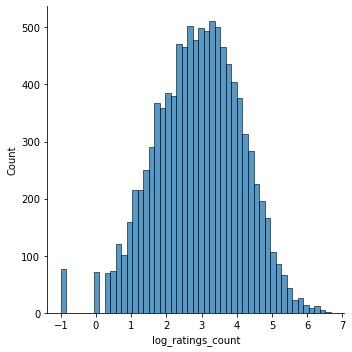

In [255]:
sns.displot(df.log_ratings_count)

In [256]:
# Define the bins using logarithmic scale
# since the distribution of the ratings_count_updt column is highly skewed, 
# using logarithmic bins is a good choice for creating more evenly distributed categories.
bins = [-1, np.log10(10), np.log10(100), np.log10(1000), np.log10(10000), np.log10(100000), np.inf]

In [257]:
# Define the labels for each category
labels = ['very low', 'low', 'medium', 'medium high', 'high', 'very high']

In [258]:
# Use pandas cut() function to categorize the values creating a new column with the category labels based on the log_ratings_count_updt column
df['ratings_count_category'] = pd.cut(df['log_ratings_count'], bins=bins, labels=labels)

In [259]:
df['ratings_count_category'].value_counts()

medium high    3002
medium         2905
low            1817
high           1610
very low        549
very high       352
Name: ratings_count_category, dtype: int64

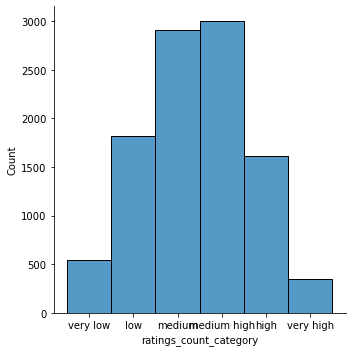

In [260]:
sns.displot(df.ratings_count_category)

In [261]:
# other different bin sizes tried
# bins2 = [-1, np.log10(100), np.log10(1000), np.log10(10000), np.log10(100000), np.log10(1000000), np.inf]
# medium         3002
# low            2905
# very low       2366
# medium high    1610
# high            322
# very high        30

# bins3 = [-np.inf, np.log10(100), np.log10(1000), np.log10(10000), np.log10(100000), np.log10(1000000), np.inf]
# medium         3002
# low            2905
# very low       2442
# medium high    1610
# high            322
# very high        30

In [262]:
# from categorical categories to numerical categories
# Use same function to map the values (set_value)
 
# Create the dictionary that assigns a number to each category
ratingscat_dictionary ={'very low' : 1, 'low' : 2, 'medium' : 3, 'medium high' : 4, 'high' : 5, 'very high' : 6}
 
# Add a new column named 'ratings_count_category_T'
df['ratings_count_category_T'] = df['ratings_count_category'].apply(set_value, args =(ratingscat_dictionary, ))

In [263]:
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,aristophanis comoediae : volume i,aristophanes,novel-narrative,1,3,"[aristophanes, f.w. hall, w.m. geldart]",aristophanes,0,0,364,2,1922,winter,1,19,grc,-1.000000,NaN,NaN
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter,1,20,eng,0.322219,very low,1
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10311 entries, 624 to 10497
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   bookid                    10311 non-null  int64         
 1   title                     10311 non-null  object        
 2   authors                   10311 non-null  object        
 3   average_rating            10311 non-null  float64       
 4   isbn                      10311 non-null  object        
 5   isbn13                    10311 non-null  int64         
 6   language_code             10311 non-null  object        
 7   num_pages                 10311 non-null  int64         
 8   ratings_count             10311 non-null  int64         
 9   text_reviews_count        10311 non-null  int64         
 10  publication_date          10311 non-null  datetime64[ns]
 11  publisher                 10311 non-null  object        
 12  title2          

In [265]:
# Dealing with NA created with the transformation into categories

In [266]:
df[df['ratings_count_category'].isna()]

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.00,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,aristophanis comoediae : volume i,aristophanes,novel-narrative,1,3,"[aristophanes, f.w. hall, w.m. geldart]",aristophanes,0,0,364,2,1922,winter,1,19,grc,-1.0,NaN,NaN
9847,39580,the american campaign: u.s. presidential campa...,james e. campbell,5.00,089096940X,9780890969403,eng,314,0,0,2000-05-01,texas a&m university press,american campaign,james e. campbell,social-political,0,1,[james e. campbell],james e. campbell,0,0,314,5,2000,spring,2,20,eng,-1.0,NaN,NaN
10262,41639,bill gates: computer legend (famous lives),sara barton-wood,5.00,0739844326,9780739844328,eng,48,0,0,2001-11-01,raintree,"bill gates, computer legend",sara barton-wood,novel-narrative,0,1,[sara barton-wood],sara barton-wood,0,0,48,11,2001,autumn,4,20,eng,-1.0,NaN,NaN
6973,26410,wissenschaft der logik: die lehre vom begriff ...,georg wilhelm friedrich hegel,4.78,3787307672,9783787307678,ger,337,0,0,1994-01-01,f. meiner,wissenschaft der logik,georg wilhelm friedrich hegel,religious-philosophical,0,1,[georg wilhelm friedrich hegel],georg wilhelm friedrich hegel,0,0,337,1,1994,winter,1,19,ger,-1.0,NaN,NaN
6813,25685,an odyssey in learning and perception,eleanor j. gibson,4.50,026257103X,9780262571036,eng,654,0,0,1994-02-03,bradford book,an odyssey in learning and perception (learnin...,eleanor j. gibson,social-political,0,1,[eleanor j. gibson],eleanor j. gibson,0,0,654,2,1994,winter,1,19,eng,-1.0,NaN,NaN
9063,35313,la ley del exito,paramahansa yogananda,4.44,0876121512,9780876121511,spa,32,0,0,1998-06-01,self-realization fellowship publishers,la ley del exito,paramahansa yogananda,autobiography-biography,0,1,[paramahansa yogananda],paramahansa yogananda,0,0,32,6,1998,summer,3,19,spa,-1.0,NaN,NaN
5475,19787,the goon show: moriarty where are you?,not a book,4.43,0563388544,9780563388548,eng,2,0,0,2005-03-30,bbc physical audio,the goon show classics (bbc radio collection),not a book,guidebook,0,1,[not a book],not a book,0,0,2,3,2005,spring,2,20,eng,-1.0,NaN,NaN
7869,30270,pacto con un demonio,kim harrison,4.39,0060898720,9780060898724,spa,512,0,0,2008-07-01,harpertorch,pacto con un demonio,kim harrison,not specified,0,1,[kim harrison],kim harrison,0,0,512,7,2008,summer,3,20,spa,-1.0,NaN,NaN
7751,29927,a farewell to arms?: beyond the good friday ag...,adrian guelke/michael cox/fiona stephen,4.33,0719071151,9780719071157,eng,624,0,0,2006-04-18,manchester university press,a farewell to arms?,michael cox,novel-narrative,1,3,"[adrian guelke, michael cox, fiona stephen]",adrian guelke,0,0,624,4,2006,spring,2,20,eng,-1.0,NaN,NaN
3379,12346,premières histoires,joão guimarães rosa,4.33,2864240157,9782864240150,fre,205,0,0,1995-03-31,métailié,premières histoires,joão guimarães rosa,historical,0,1,[joão guimarães rosa],joão guimarães rosa,0,0,205,3,1995,spring,2,19,fre,-1.0,NaN,NaN


In [267]:
df['ratings_count_category'].isna().sum()

76

In [268]:
df['ratings_count_updt'][df['ratings_count_category'].isna()] #if there is a NA in ratings_count_category the ratings_count_updt == 0

624      0
9847     0
10262    0
6973     0
6813     0
9063     0
5475     0
7869     0
7751     0
3379     0
7175     0
8742     0
2956     0
3235     0
3007     0
4854     0
10164    0
2255     0
6084     0
3006     0
6999     0
5724     0
264      0
10442    0
9198     0
1110     0
8052     0
935      0
3240     0
3133     0
8875     0
4213     0
6393     0
9698     0
6806     0
6560     0
2051     0
10849    0
5779     0
7209     0
8763     0
10862    0
526      0
10513    0
747      0
3348     0
10309    0
9155     0
525      0
4746     0
1681     0
6558     0
4677     0
7399     0
7634     0
9331     0
7573     0
11027    0
10917    0
265      0
7797     0
6380     0
10138    0
7144     0
5323     0
375      0
987      0
2758     0
9437     0
4241     0
6859     0
6877     0
3492     0
2533     0
2532     0
10497    0
Name: ratings_count_updt, dtype: int64

In [269]:
# look for 0 values in ratings_count and text_reviews_count
df[['average_rating']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)]

,average_rating
624,5.0
9893,5.0
9720,5.0
4933,5.0
6775,5.0
...,...
6877,0.0
3492,0.0
2533,0.0
2532,0.0


In [270]:
# what is the average rating when either ratings_count_updt or text_reviews_count_updt have 0 value ?

In [271]:
df[['average_rating']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)].mean() # rows with 0 value in either ratings_count or text_reviews_count or both

average_rating    3.75622
dtype: float64

In [272]:
df[['average_rating']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)].mode() # rows with 0 value in either ratings_count or text_reviews_count or both

,average_rating
0,4.0


In [273]:
df[['average_rating']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)].median() # rows with 0 value in either ratings_count or text_reviews_count or both

average_rating    3.94
dtype: float64

In [274]:
# look for 0 or 5 values in average_rating when both ratings_count and text_reviews_count == 0
df[['average_rating','title','main_author']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)  & ((df[['average_rating']]==0) | (df[['average_rating']]==5)).any(1)]

,average_rating,title,main_author
624,5.0,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes
9893,5.0,his princess devotional: a royal encounter wit...,sheri rose shepherd
9720,5.0,the irish anatomist: a study of flann o'brien,keith donohue
4933,5.0,bulgakov's the master and margarita: the text ...,elena n. mahlow
6775,5.0,delwau duon: peintiadau nicholas evans = symph...,nicholas evans
786,5.0,willem de kooning: late paintings,julie sylvester
4125,5.0,zone of the enders: the 2nd runner official st...,tim bogenn
5023,5.0,the complete theory fun factory: music theory ...,ian martin
9847,5.0,the american campaign: u.s. presidential campa...,james e. campbell
5648,5.0,colossians and philemon: a critical and exeget...,r. mcl. wilson


In [275]:
# look for 0 or 5 values in average_rating when both ratings_count and text_reviews_count == 0
df[['average_rating','title','main_author']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)  & ((df[['average_rating']]==0) | (df[['average_rating']]==5)).any(1)].count()

average_rating    41
title             41
main_author       41
dtype: int64

In [276]:
# dropping the rows where both ratings_count and text_reviews_count == 0 & average_rating is either 0 or 5
df = df[~(((df['ratings_count_updt'] == 0) & (df['text_reviews_count_updt'] == 0) & ((df['average_rating'] == 0) | (df['average_rating'] == 5))))] 
# drop rows where ratings_count_updt and text_reviews_count_updt are both 0 and average_rating is either 0 or 5

In [277]:
df[df['ratings_count_category'].isna()]

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T
6973,26410,wissenschaft der logik: die lehre vom begriff ...,georg wilhelm friedrich hegel,4.78,3787307672,9783787307678,ger,337,0,0,1994-01-01,f. meiner,wissenschaft der logik,georg wilhelm friedrich hegel,religious-philosophical,0,1,[georg wilhelm friedrich hegel],georg wilhelm friedrich hegel,0,0,337,1,1994,winter,1,19,ger,-1.0,NaN,NaN
6813,25685,an odyssey in learning and perception,eleanor j. gibson,4.50,026257103X,9780262571036,eng,654,0,0,1994-02-03,bradford book,an odyssey in learning and perception (learnin...,eleanor j. gibson,social-political,0,1,[eleanor j. gibson],eleanor j. gibson,0,0,654,2,1994,winter,1,19,eng,-1.0,NaN,NaN
9063,35313,la ley del exito,paramahansa yogananda,4.44,0876121512,9780876121511,spa,32,0,0,1998-06-01,self-realization fellowship publishers,la ley del exito,paramahansa yogananda,autobiography-biography,0,1,[paramahansa yogananda],paramahansa yogananda,0,0,32,6,1998,summer,3,19,spa,-1.0,NaN,NaN
5475,19787,the goon show: moriarty where are you?,not a book,4.43,0563388544,9780563388548,eng,2,0,0,2005-03-30,bbc physical audio,the goon show classics (bbc radio collection),not a book,guidebook,0,1,[not a book],not a book,0,0,2,3,2005,spring,2,20,eng,-1.0,NaN,NaN
7869,30270,pacto con un demonio,kim harrison,4.39,0060898720,9780060898724,spa,512,0,0,2008-07-01,harpertorch,pacto con un demonio,kim harrison,not specified,0,1,[kim harrison],kim harrison,0,0,512,7,2008,summer,3,20,spa,-1.0,NaN,NaN
7751,29927,a farewell to arms?: beyond the good friday ag...,adrian guelke/michael cox/fiona stephen,4.33,0719071151,9780719071157,eng,624,0,0,2006-04-18,manchester university press,a farewell to arms?,michael cox,novel-narrative,1,3,"[adrian guelke, michael cox, fiona stephen]",adrian guelke,0,0,624,4,2006,spring,2,20,eng,-1.0,NaN,NaN
3379,12346,premières histoires,joão guimarães rosa,4.33,2864240157,9782864240150,fre,205,0,0,1995-03-31,métailié,premières histoires,joão guimarães rosa,historical,0,1,[joão guimarães rosa],joão guimarães rosa,0,0,205,3,1995,spring,2,19,fre,-1.0,NaN,NaN
7175,27520,katy and the big snow (book & cassette),virginia lee burton,4.24,0395959918,9780395959916,eng,40,0,0,1999-08-30,houghton mifflin harcourt,katy and the big snow,virginia lee burton,fiction,0,1,[virginia lee burton],virginia lee burton,0,0,40,8,1999,summer,3,19,eng,-1.0,NaN,NaN
8742,33705,does god know how to tie shoes?,nancy white carlstrom/lori mcelrath-eslick,4.20,0802850898,9780802850898,eng,32,0,0,1997-01-31,william b. eerdmans publishing company,does god know how to tie shoes?,nancy white carlstrom,religious-philosophical,1,2,"[nancy white carlstrom, lori mcelrath-eslick]",nancy white carlstrom,0,0,32,1,1997,winter,1,19,eng,-1.0,NaN,NaN
2956,10939,ya sé que te quiero,billy crystal/elizabeth sayles,4.19,0060845988,9780060845988,spa,40,0,0,2006-04-11,rayo,i already know i love you (spanish edition),billy crystal,fiction,1,2,"[billy crystal, elizabeth sayles]",billy crystal,0,0,40,4,2006,spring,2,20,spa,-1.0,NaN,NaN


In [278]:
df.isna().sum()

bookid                       0
title                        0
authors                      0
average_rating               0
isbn                         0
isbn13                       0
language_code                0
num_pages                    0
ratings_count                0
text_reviews_count           0
publication_date             0
publisher                    0
title2                       0
author2                      0
genre                        0
multiple_authors             0
n_authors                    0
authors_list                 0
main_author                  0
ratings_count_updt           0
text_reviews_count_updt      0
max_pages                    0
pub_month                    0
pub_year                     0
season                       0
season_num                   0
century                      0
language_code_ENgroup        0
log_ratings_count            0
ratings_count_category      49
ratings_count_category_T    49
dtype: int64

In [279]:
df['ratings_count_category'] = df['ratings_count_category'].fillna('very low')
df['ratings_count_category_T'] = df['ratings_count_category_T'].fillna(1)

In [280]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
dtype: int64

###### Transform categoricals variable into numerical
- 2. Language, author and publisher -> Transform in numerical data

In [281]:
df['main_author'].value_counts().shape


(4169,)

In [282]:
# transform categorical variables into numerical variables with map and dictionary assigning random integers to avoid creating ordinal relationships

# create dictionary of values to random integer mapping
value_map = {value: np.random.randint(100000) for value in df['main_author'].unique()}

# use map method to apply the mapping to the column
df['main_author_T'] = df['main_author'].map(value_map)

df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1,22516
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter,1,20,eng,0.322219,very low,1,54756
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1,20516
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519


In [283]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
dtype: int64

In [284]:
df['publisher'].value_counts().shape


(2168,)

In [285]:
# transform categorical variables into numerical variables with map and dictionary assigning random integers to avoid creating ordinal relationships

# create dictionary of values to random integer mapping
value_map = {value: np.random.randint(100000) for value in df['publisher'].unique()}

# use map method to apply the mapping to the column
df['publisher_T'] = df['publisher'].map(value_map)

df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115,59435
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1,22516,3747
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter,1,20,eng,0.322219,very low,1,54756,94966
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1,20516,46986
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519,30657


In [286]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
publisher_T                 0
dtype: int

In [287]:
df['language_code'].value_counts().shape

(25,)

In [288]:
# transform categorical variables into numerical variables with map and dictionary assigning random integers to avoid creating ordinal relationships

# create dictionary of values to random integer mapping
value_map = {value: np.random.randint(100000) for value in df['language_code'].unique()}

# use map method to apply the mapping to the column
df['language_code_T'] = df['language_code'].map(value_map)

df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115,59435,57727
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1,22516,3747,57727
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter,1,20,eng,0.322219,very low,1,54756,94966,57727
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1,20516,46986,57727
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519,30657,57727


In [289]:
df.isna().sum() #why null values when creating the categories ?

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
publisher_T                 0
language_c

In [290]:
# transform categorical variables into numerical variables with map and dictionary assigning random integers to avoid creating ordinal relationships

# create dictionary of values to random integer mapping
value_map = {value: np.random.randint(100000) for value in df['language_code_ENgroup'].unique()}

# use map method to apply the mapping to the column
df['language_code_ENgroup_T'] = df['language_code_ENgroup'].map(value_map)

df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115,59435,57727,85878
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1,22516,3747,57727,85878
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,tyrannosaurus wrecks,laura driscoll,fiction,1,3,"[laura driscoll, alisa klayman-grodsky, eric ...",laura driscoll,2,1,24,2,2003,winter,1,20,eng,0.322219,very low,1,54756,94966,57727,85878
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1,20516,46986,57727,85878
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519,30657,57727,85878


In [291]:
df[['main_author','main_author_T','publisher','publisher_T','language_code','language_code_T','language_code_ENgroup','language_code_ENgroup_T']].head()

,main_author,main_author_T,publisher,publisher_T,language_code,language_code_T,language_code_ENgroup,language_code_ENgroup_T
9893,sheri rose shepherd,63115,multnomah,59435,eng,57727,eng,85878
4788,john diamond,22516,square one publishers,3747,eng,57727,eng,85878
9324,laura driscoll,54756,disney press,94966,eng,57727,eng,85878
9720,keith donohue,20516,academica press,46986,eng,57727,eng,85878
4933,elena n. mahlow,67519,vantage press,30657,eng,57727,eng,85878


In [292]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
publisher_T                 0
language_c

###### Transform num_pages & max_pages
- 3. Transform num pages into category (low, medium, high) -> classic spliting 

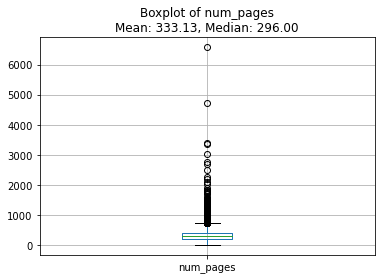

In [293]:
# Compute the mean and median values for the 'num_pages' column
mean_value = df['num_pages'].mean()
median_value = df['num_pages'].median()

# Plot a boxplot for the 'num_pages' column
ax = df.boxplot(column='num_pages')
ax.set_title('Boxplot of num_pages\nMean: {:.2f}, Median: {:.2f}'.format(mean_value, median_value))
plt.show()

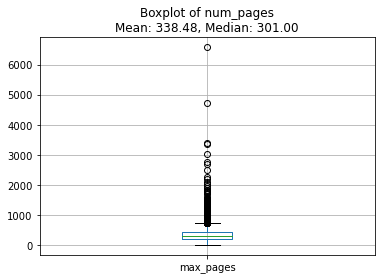

In [294]:
# Compute the mean and median values for the 'max_pages' column
mean_value = df['max_pages'].mean()
median_value = df['max_pages'].median()

# Plot a boxplot for the 'max_pages' column
ay = df.boxplot(column='max_pages')
ay.set_title('Boxplot of num_pages\nMean: {:.2f}, Median: {:.2f}'.format(mean_value, median_value))
plt.show()

In [295]:
# Define the bin ranges for the categories
bins = [0, 50, 200, 400, 1000, float('inf')]

# Define the labels for the categories
labels = ['very low', 'low', 'medium', 'high', 'very high']

# Use the cut() function to convert the numerical values into categories
df['num_pages_cat'] = pd.cut(df['num_pages'], bins=bins, labels=labels)
df['max_pages_cat'] = pd.cut(df['max_pages'], bins=bins, labels=labels)

In [296]:
# from categorical categories to numerical categories
# Use same function to map the values (set_value)
 
# Create the dictionary that assigns a number to each category
numpagcat_dictionary ={'very low' : 1, 'low' : 2, 'medium' : 3, 'high' : 4, 'very high' : 5}
 
# Add a new column named 'num_pages_cat_T'
df['num_pages_cat_T'] = df['num_pages_cat'].apply(set_value, args =(numpagcat_dictionary, ))

In [297]:
# from categorical categories to numerical categories
# Use same function to map the values (set_value)
 
# Create the dictionary that assigns a number to each category
maxpagcat_dictionary ={'very low' : 1, 'low' : 2, 'medium' : 3, 'high' : 4, 'very high' : 5}
 
# Add a new column named 'max_pages_cat_T'
df['max_pages_cat_T'] = df['max_pages_cat'].apply(set_value, args =(maxpagcat_dictionary, ))

In [298]:
df.isna().sum()

bookid                       0
title                        0
authors                      0
average_rating               0
isbn                         0
isbn13                       0
language_code                0
num_pages                    0
ratings_count                0
text_reviews_count           0
publication_date             0
publisher                    0
title2                       0
author2                      0
genre                        0
multiple_authors             0
n_authors                    0
authors_list                 0
main_author                  0
ratings_count_updt           0
text_reviews_count_updt      0
max_pages                    0
pub_month                    0
pub_year                     0
season                       0
season_num                   0
century                      0
language_code_ENgroup        0
log_ratings_count            0
ratings_count_category       0
ratings_count_category_T     0
main_author_T                0
publishe

In [299]:
df[df['num_pages_cat'].isna()] # the NA are when num_page = 0 (problem solved before for max_pages)

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T
4811,17277,the feynman lectures on physics vols 7-8,richard p. feynman,4.80,0738209279,9780738209272,en-us,0,20,0,2006-01-03,basic books,the feynman lectures on physics volumes 7-8,richard phillips feynman,science-medicine,0,1,[richard p. feynman],richard p. feynman,20,0,219,1,2006,winter,1,20,eng,1.303196,low,2,96458,14499,23962,85878,NaN,medium,NaN,3
4810,17276,the feynman lectures on physics vols 3-4,richard p. feynman,4.71,0738209252,9780738209258,en-us,0,21,0,2004-05-12,basic books,the feynman lectures on physics volumes 3-4,richard phillips feynman,science-medicine,0,1,[richard p. feynman],richard p. feynman,21,0,219,5,2004,spring,2,20,eng,1.324282,low,2,96458,14499,23962,85878,NaN,medium,NaN,3
306,955,the 5 love languages / the 5 love languages jo...,gary chapman,4.70,0802415318,9780802415318,eng,0,22,4,2005-01-01,moody publishers,the five love languages faux leather bound jou...,gary d. chapman,autobiography-biography,0,1,[gary chapman],gary chapman,22,4,158,1,2005,winter,1,20,eng,1.344392,low,2,68562,20095,57727,85878,NaN,low,NaN,2
8447,32498,john grisham value collection: a time to kill ...,john grisham/michael beck/blair brown/d.w. mof...,4.50,0739312642,9780739312643,eng,0,476,9,2004-06-01,random house audio,john grisham value collection,john grisham,not specified,1,4,"[john grisham, michael beck, blair brown, d.w....",john grisham,476,9,315,6,2004,summer,3,20,eng,2.677698,medium,3,89582,53029,57727,85878,NaN,medium,NaN,3
4973,17983,the reverse of the medal (aubrey/maturin #11),patrick o'brian/simon vance,4.41,0786178183,9780786178186,en-gb,0,3598,93,2006-02-01,blackstone audiobooks,the reverse of the medal,patrick o'brian,novel-narrative,1,2,"[patrick o'brian, simon vance]",patrick o'brian,3598,93,711,2,2006,winter,1,20,eng,3.556073,medium high,4,18168,6683,15149,85878,NaN,high,NaN,4
3730,13504,a clash of kings (a song of ice and fire #2),george r.r. martin/roy dotrice,4.41,073930870X,9780739308707,eng,0,113,12,2004-02-17,random house audio,"a clash of kings (martin, george r. r. song of...",george r. r. martin,fantasy,1,2,"[george r.r. martin, roy dotrice]",george r.r. martin,113,12,439,2,2004,winter,1,20,eng,2.053463,medium,3,25835,53029,57727,85878,NaN,high,NaN,4
9914,39959,the carl hiaasen collection: lucky you and sic...,carl hiaasen/edward asner,4.32,0739340824,9780739340820,en-us,0,90,5,2006-06-06,random house audio,the carl hiaasen collection,carl hiaasen,travel,1,2,"[carl hiaasen, edward asner]",carl hiaasen,90,5,322,6,2006,summer,3,20,eng,1.954725,low,2,1628,53029,23962,85878,NaN,medium,NaN,3
10018,40343,the full box (full #1-4),janet evanovich/charlotte hughes,4.29,1593979266,9781593979263,eng,0,101,3,2016-02-16,macmillan audio,the full box,janet evanovich,not specified,1,2,"[janet evanovich, charlotte hughes]",janet evanovich,101,3,303,2,2016,winter,1,20,eng,2.004751,medium,3,41434,90337,57727,85878,NaN,medium,NaN,3
5866,22077,the michael crichton collection: jurassic park...,michael crichton/chris noth/anthony heald,4.29,0375415807,9780375415807,eng,0,107,3,2000-06-09,random house audio,michael crichton value collection (the michael...,michael crichton,not specified,1,3,"[michael crichton, chris noth, anthony heald]",michael crichton,107,3,370,6,2000,summer,3,20,eng,2.029789,medium,3,74988,53029,57727,85878,NaN,medium,NaN,3
5841,21933,point of impact (bob lee swagger #1),stephen hunter/beau bridges,4.27,0739344242,9780739344248,eng,0,15,1,2007-01-09,rh audio,point of impact,stephen hunter,myst

In [300]:
df['num_pages_cat'] = df['num_pages_cat'].fillna('very low')
df['num_pages_cat_T'] = df['num_pages_cat_T'].fillna(1)

In [301]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
publisher_T                 0
language_c

In [302]:
df['num_pages_cat'].value_counts()

medium       4855
high         2497
low          2237
very low      509
very high     186
Name: num_pages_cat, dtype: int64

In [303]:
df['max_pages_cat'].value_counts() 
# the categories for max_pae are slightly better distributed than those of num_pages because num_pages=0 have been previously filled with more plausible values

medium       4897
high         2556
low          2221
very low      417
very high     193
Name: max_pages_cat, dtype: int64

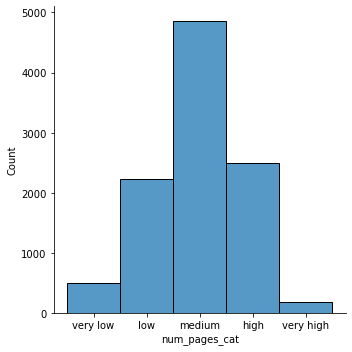

In [304]:
sns.displot(df.num_pages_cat)

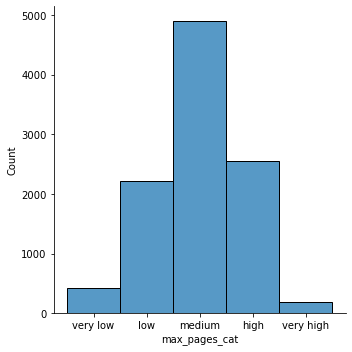

In [305]:
sns.displot(df.max_pages_cat)

###### Trasform rating 
- 4. Transform rating into category (bad, medium, good) -> log function (important data : 91% of data between 3,5 and 4,4, lloks like a normal law)

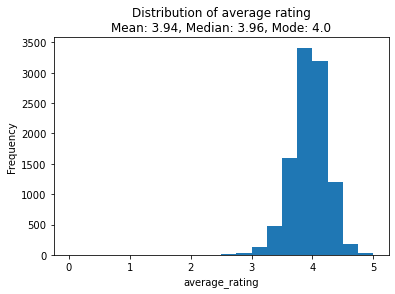

In [306]:
# Plot the distribution of the 'rating' column using a log function
mean_value = df['average_rating'].mean()
median_value = df['average_rating'].median()
mode_value = df['average_rating'].mode()
plt.hist((df['average_rating']), bins=20)
plt.xlabel('average_rating')
plt.ylabel('Frequency')
plt.title('Distribution of average rating\nMean: {:.2f}, Median: {:.2f}, Mode: 4.0'.format(mean_value, median_value))

plt.show()
# mean < median < mode Left Skewed Distribution

In [307]:
# Define the bin ranges for the categories
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]

# Define the labels for the categories
labels = ['very bad','bad', 'medium', 'good', 'very good']

#I would like 'very good' to be just for df['average_rating']==5 and very bad df['average_rating']==0 and the rest equally distributed

# Use the cut() function to convert the numerical values into categories
df['average_rating_cat'] = pd.cut(df['average_rating'], bins=bins, labels=labels)

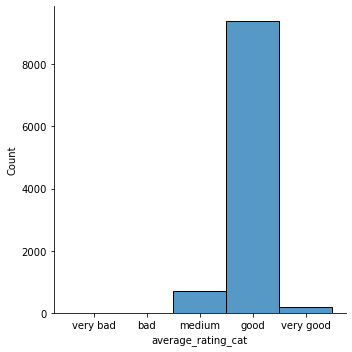

In [308]:
sns.displot(df.average_rating_cat)

In [309]:
# from categorical categories to numerical categories
# Use same function to map the values (set_value)
 
# Create the dictionary that assigns a number to each category
ratingscat_dictionary ={'very bad' : 1, 'bad' : 2, 'medium' : 3, 'good' : 4, 'very good' : 5}
 
# Add a new column named 'average_rating_cat_T'
df['average_rating_cat_T'] = df['average_rating_cat'].apply(set_value, args =(ratingscat_dictionary, ))

In [310]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
publisher_T                 0
language_c

In [311]:
df[df['average_rating_cat'].isna()] 
# the NA is in a raw with average rating = 0, ratings count=0 and text reviews = 1 we can drop it since it doesn't seem to be very meaningful

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T,average_rating_cat,average_rating_cat_T
10138,41044,day and night,better homes and gardens,0.0,0696018829,9780696018824,eng,32,0,1,1989-03-01,meredith corporation,day and night.,better homes and gardens,art,0,1,[better homes and gardens],better homes and gardens,0,1,32,3,1989,spring,2,19,eng,-1.0,very low,1,79030,50313,57727,85878,very low,very low,1,1,NaN,NaN


In [312]:
df = df.dropna(subset=['average_rating_cat'])

In [313]:
df.isna().sum()

bookid                      0
title                       0
authors                     0
average_rating              0
isbn                        0
isbn13                      0
language_code               0
num_pages                   0
ratings_count               0
text_reviews_count          0
publication_date            0
publisher                   0
title2                      0
author2                     0
genre                       0
multiple_authors            0
n_authors                   0
authors_list                0
main_author                 0
ratings_count_updt          0
text_reviews_count_updt     0
max_pages                   0
pub_month                   0
pub_year                    0
season                      0
season_num                  0
century                     0
language_code_ENgroup       0
log_ratings_count           0
ratings_count_category      0
ratings_count_category_T    0
main_author_T               0
publisher_T                 0
language_c

#### Dataset Analysis
- DESCRIBE DATA
- ANALYSIS PART - Create a column average of rating vote -> average by author (keep this one but demonstrate we thought about the other option)	ponderate average by nb of votes

- ISBN13 et 10 -> Find a table equivalent for region/ country	

- AT THE END - Useless column (idbook) -> Delete
- AT THE END - Remove other useless or redundant colums
- AT THE END - Change the order of the columns of the table putting at the beginning those that are the key for prediction purposes then other columns by importance


In [314]:
#new variables

###### Inspecting the original dataset
- 1. Describe Data

In [315]:
df.columns

Index(['bookid', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'title2', 'author2', 'genre', 'multiple_authors', 'n_authors', 'authors_list', 'main_author', 'ratings_count_updt', 'text_reviews_count_updt', 'max_pages', 'pub_month', 'pub_year', 'season', 'season_num', 'century', 'language_code_ENgroup', 'log_ratings_count', 'ratings_count_category', 'ratings_count_category_T', 'main_author_T', 'publisher_T', 'language_code_T', 'language_code_ENgroup_T', 'num_pages_cat', 'max_pages_cat', 'num_pages_cat_T', 'max_pages_cat_T', 'average_rating_cat', 'average_rating_cat_T'], dtype='object')

In [316]:
df1 = df.copy()

In [317]:
df1 = df1.drop(['bookid', 'title', 'authors', 'isbn', 'isbn13'], axis=1)

In [318]:
df1.columns

Index(['average_rating', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'title2', 'author2', 'genre', 'multiple_authors', 'n_authors', 'authors_list', 'main_author', 'ratings_count_updt', 'text_reviews_count_updt', 'max_pages', 'pub_month', 'pub_year', 'season', 'season_num', 'century', 'language_code_ENgroup', 'log_ratings_count', 'ratings_count_category', 'ratings_count_category_T', 'main_author_T', 'publisher_T', 'language_code_T', 'language_code_ENgroup_T', 'num_pages_cat', 'max_pages_cat', 'num_pages_cat_T', 'max_pages_cat_T', 'average_rating_cat', 'average_rating_cat_T'], dtype='object')

In [319]:
# Define the order of the columns
new_order = ['main_author',  'main_author_T','multiple_authors', 'n_authors',
             'average_rating', 'average_rating_cat', 'average_rating_cat_T',
             'ratings_count', 'ratings_count_updt', 'log_ratings_count','ratings_count_category','ratings_count_category_T',
             'text_reviews_count','text_reviews_count_updt',
             'language_code','language_code_T',
             'language_code_ENgroup', 'language_code_ENgroup_T',
             'num_pages','num_pages_cat','num_pages_cat_T',
             'max_pages', 'max_pages_cat', 'max_pages_cat_T',
             'publication_date', 'pub_month', 'pub_year', 'season', 'season_num', 'century',
             'publisher', 'publisher_T'
             ]

# Use the reindex method to reorder the columns
df1 = df1.reindex(columns=new_order)

In [320]:
df1.info() 
# ratings_count_category 10235
# ratings_count_category_T  10235
# num_pages_cat             10242
# num_pages_cat_T             10242
# average_rating_cat        10286
# average_rating_cat_T        10286
#
#
#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10283 entries, 9893 to 9539
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   main_author               10283 non-null  object        
 1   main_author_T             10283 non-null  int64         
 2   multiple_authors          10283 non-null  int32         
 3   n_authors                 10283 non-null  int64         
 4   average_rating            10283 non-null  float64       
 5   average_rating_cat        10283 non-null  category      
 6   average_rating_cat_T      10283 non-null  category      
 7   ratings_count             10283 non-null  int64         
 8   ratings_count_updt        10283 non-null  int64         
 9   log_ratings_count         10283 non-null  float64       
 10  ratings_count_category    10283 non-null  category      
 11  ratings_count_category_T  10283 non-null  category      
 12  text_reviews_cou

In [321]:
df1.sample(1)

,main_author,main_author_T,multiple_authors,n_authors,average_rating,average_rating_cat,average_rating_cat_T,ratings_count,ratings_count_updt,log_ratings_count,ratings_count_category,ratings_count_category_T,text_reviews_count,text_reviews_count_updt,language_code,language_code_T,language_code_ENgroup,language_code_ENgroup_T,num_pages,num_pages_cat,num_pages_cat_T,max_pages,max_pages_cat,max_pages_cat_T,publication_date,pub_month,pub_year,season,season_num,century,publisher,publisher_T
7117,indu sundaresan,19596,0,1,4.04,good,4,11380,11380,4.056146,high,5,1253,1253,en-us,23962,eng,85878,380,medium,3,380,medium,3,2003-02-18,2,2003,winter,1,20,washington square press,79293


In [322]:
df1.columns

Index(['main_author', 'main_author_T', 'multiple_authors', 'n_authors', 'average_rating', 'average_rating_cat', 'average_rating_cat_T', 'ratings_count', 'ratings_count_updt', 'log_ratings_count', 'ratings_count_category', 'ratings_count_category_T', 'text_reviews_count', 'text_reviews_count_updt', 'language_code', 'language_code_T', 'language_code_ENgroup', 'language_code_ENgroup_T', 'num_pages', 'num_pages_cat', 'num_pages_cat_T', 'max_pages', 'max_pages_cat', 'max_pages_cat_T', 'publication_date', 'pub_month', 'pub_year', 'season', 'season_num', 'century', 'publisher', 'publisher_T'], dtype='object')

In [323]:
# describing columns with categorical values (not considering title since it is just identifier)
df1[['main_author', 'average_rating_cat','ratings_count_category', 'language_code', 'language_code_ENgroup', 'num_pages_cat', 'max_pages_cat','season', 'publisher']].describe()

,main_author,average_rating_cat,ratings_count_category,language_code,language_code_ENgroup,num_pages_cat,max_pages_cat,season,publisher
count,10283,10283,10283,10283,10283,10283,10283,10283,10283
unique,4168,5,6,25,22,5,5,4,2167
top,stephen king,good,medium high,eng,eng,medium,medium,autumn,vintage
freq,62,9389,3002,8215,9734,4855,4897,3108,292


In [324]:
# describing columns with numerical values (not considering bookid, isbn, isbn13 since they are just identifiers)
df1[['main_author_T', 'multiple_authors', 'n_authors', 'average_rating', 'average_rating_cat_T', 'ratings_count', 'ratings_count_updt', 'log_ratings_count', 'ratings_count_category_T', 'text_reviews_count', 'text_reviews_count_updt', 'language_code_T', 'language_code_ENgroup_T', 'num_pages', 'num_pages_cat_T', 'max_pages', 'max_pages_cat_T', 'publication_date', 'pub_month', 'pub_year', 'season_num', 'century', 'publisher_T']].describe()
# look at the min row there are many variables with value=0 
# go deep to find if that brings bad consequences to our dataset

,main_author_T,multiple_authors,n_authors,average_rating,ratings_count,ratings_count_updt,log_ratings_count,text_reviews_count,text_reviews_count_updt,language_code_T,language_code_ENgroup_T,num_pages,max_pages,pub_month,pub_year,season_num,century,publisher_T
count,10283.000000,10283.000000,10283.000000,10283.000000,1.028300e+04,1.028300e+04,10283.000000,10283.000000,10283.000000,10283.00000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000
mean,50196.754546,0.398911,1.715161,3.943169,1.518750e+04,1.940857e+04,2.908127,488.142176,586.326947,52426.53924,84170.008363,333.156666,338.513080,6.561898,2000.186230,2.603423,19.690168,47796.849460
std,28102.418803,0.489698,1.844750,0.299832,9.789992e+04,1.173920e+05,1.208134,2364.628820,2697.720878,13536.75911,9656.653826,238.782740,239.361465,3.412042,8.201107,1.138731,0.462447,27227.110034
min,13.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,-1.000000,0.000000,0.000000,2069.00000,9641.000000,0.000000,1.000000,1.000000,1900.000000,1.000000,19.000000,17.000000
25%,25425.000000,0.000000,1.000000,3.770000,1.040000e+02,1.140000e+02,2.057286,9.000000,9.000000,57727.00000,85878.000000,192.000000,198.500000,4.000000,1998.000000,2.000000,19.000000,25220.000000
50%,49885.000000,0.000000,1.000000,3.960000,7.680000e+02,8.850000e+02,2.946992,46.000000,52.000000,57727.00000,85878.000000,296.000000,301.000000,7.000000,2003.000000,3.000000,20.000000,46913.000000
75%,74084.500000,1.000000,2.000000,4.140000,5.043500e+03,5.861500e+03,3.768016,232.500000,267.000000,57727.00000,85878.000000,410.000000,416.000000,10.000000,2005.000000,4.000000,20.000000,71234.000000
max,99960.000000,1.000000,51.000000,5.000000,4.597666e+06,4.597666e+06,6.662537,94265.000000,94265.000000,96357.00000,98441.000000,6576.000000,6576.000000,12.000000,2020.000000,4.000000,20.000000,99988.000000


In [325]:
# many values = 0 in many columns, inspecting them

In [326]:
# display the rows rows which may present the issue
df[(df.T == 0).any()]
# 6518 rows have at least 1 column with at least 1 observation = 0

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T,average_rating_cat,average_rating_cat_T
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.00,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115,59435,57727,85878,medium,medium,3,3,very good,5
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.00,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1,22516,3747,57727,85878,low,low,2,2,very good,5
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.00,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1,20516,46986,57727,85878,medium,medium,3,3,very good,5
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.00,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519,30657,57727,85878,medium,medium,3,3,very good,5
6775,25426,delwau duon: peintiadau nicholas evans = symph...,nicholas evans/rhonda evans,5.00,0862431352,9780862431358,wel,150,1,0,1987-06-22,y lolfa,delwau duon,"evans, nicholas",art,1,2,"[nicholas evans, rhonda evans]",nicholas evans,1,0,150,6,1987,summer,3,19,wel,0.041393,very low,1,19547,33902,52085,78377,low,low,2,2,very good,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,13964,the boys of the archangel raphael: a youth con...,konrad eisenbichler,2.00,0802043291,9780802043290,eng,498,1,0,1998-05-30,university of toronto press,the boys of the archangel raphael,konrad eisenbichler,novel-narrative,0,1,[konrad eisenbichler],konrad eisenbichler,1,0,498,5,1998,spring,2,19,eng,0.041393,very low,1,58276,60103,57727,85878,high,high,4,4,bad,2
5537,20157,mcdougal littell science: student edition grad...,mcdougal littell/douglas w. carnine,2.00,0618615385,9780618615384,eng,972,3,0,2005-04-12,mcdougal littel,mcdougal littell science,mcdougal littell/douglas w. carnine,science-medicine,1,2,"[mcdougal littell, douglas w. carnine]",mcdougal littell,3,0,972,4,2005,spring,2,20,eng,0.491362,very low,1,72567,65890,57727,85878,high,high,4,4,bad,2
7998,30651,the art of loving by erich fromm: a true story...,lala okamoto,1.67,4990327500,9784990327507,eng,227,3,2,2006-10-31,intercultural publishing,the art of loving by erich fromm,lala okamoto,art,0,1,[lala okamoto],lala okamoto,3,2,227,10,2006,autumn,4,20,eng,0.491362,very low,1,96536,69143,57727,85878,medium,medium,3,3,bad,2
3234,11854,puzzle pack: the witch of blackbird pond,mary b. collins,1.00,1583377824,9781583377826,eng,134,2,0,2005-08-15,teacher's pet publications inc.,puzzle pack,mary b. collins,not specified,0,1,[mary b. collins],mary b. collins,2,0,134,8,2005,summer,3,20,eng,0.322219,very low,1,47115,57724,57727,85878,low,low,2,2,very bad,1


In [327]:
numerical = df1[['main_author_T', 'multiple_authors', 'n_authors', 'average_rating', 'average_rating_cat_T', 'ratings_count', 'ratings_count_updt', 'log_ratings_count', 'ratings_count_category_T', 'text_reviews_count', 'text_reviews_count_updt', 'language_code_T', 'language_code_ENgroup_T', 'num_pages', 'num_pages_cat_T', 'max_pages', 'max_pages_cat_T', 'publication_date', 'pub_month', 'pub_year', 'season_num', 'century', 'publisher_T']]
categorical=df1[['main_author', 'average_rating_cat','ratings_count_category', 'language_code', 'language_code_ENgroup', 'num_pages_cat', 'max_pages_cat','season', 'publisher']]

In [328]:
# displaying just the numerical column to have a clearer view
numerical[(df==0).any(1)]

,main_author_T,multiple_authors,n_authors,average_rating,average_rating_cat_T,ratings_count,ratings_count_updt,log_ratings_count,ratings_count_category_T,text_reviews_count,text_reviews_count_updt,language_code_T,language_code_ENgroup_T,num_pages,num_pages_cat_T,max_pages,max_pages_cat_T,publication_date,pub_month,pub_year,season_num,century,publisher_T
9893,63115,0,1,5.00,5,2,2,0.322219,1,0,0,57727,85878,240,3,240,3,2007-10-16,10,2007,4,20,59435
4788,22516,0,1,5.00,5,5,5,0.707570,1,3,3,57727,85878,74,2,74,2,2006-02-01,2,2006,1,20,3747
9720,20516,0,1,5.00,5,1,1,0.041393,1,0,0,57727,85878,222,3,222,3,2003-07-25,7,2003,3,20,46986
4933,67519,0,1,5.00,5,4,4,0.612784,1,0,0,57727,85878,202,3,202,3,1975-01-01,1,1975,1,19,30657
6775,19547,1,2,5.00,5,1,1,0.041393,1,0,0,52085,78377,150,2,150,2,1987-06-22,6,1987,3,19,33902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,58276,0,1,2.00,2,1,1,0.041393,1,0,0,57727,85878,498,4,498,4,1998-05-30,5,1998,2,19,60103
5537,72567,1,2,2.00,2,3,3,0.491362,1,0,0,57727,85878,972,4,972,4,2005-04-12,4,2005,2,20,65890
7998,96536,0,1,1.67,2,3,3,0.491362,1,2,2,57727,85878,227,3,227,3,2006-10-31,10,2006,4,20,69143
3234,47115,0,1,1.00,1,2,2,0.322219,1,0,0,57727,85878,134,2,134,2,2005-08-15,8,2005,3,20,57724


In [329]:
# since our scope is predicting the rating we first look for 0 values just in ratings_count and text_reviews_count
df[['average_rating','max_pages','ratings_count_updt','text_reviews_count_updt']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)]

,average_rating,max_pages,ratings_count_updt,text_reviews_count_updt
9893,5.0,240,2,0
9720,5.0,222,1,0
4933,5.0,202,4,0
6775,5.0,150,1,0
786,5.0,83,1,0
...,...,...,...,...
1681,2.0,240,0,0
3912,2.0,498,1,0
5537,2.0,972,3,0
3234,1.0,134,2,0


In [330]:
# what is the average rating when either ratings_count_updt or text_reviews_count_updt have 0 value ?

In [331]:
df[(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)] # rows with 0 value in either ratings_count or text_reviews_count or both

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T,average_rating_cat,average_rating_cat_T
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115,59435,57727,85878,medium,medium,3,3,very good,5
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,the irish anatomist,keith donohue,novel-narrative,0,1,[keith donohue],keith donohue,1,0,222,7,2003,summer,3,20,eng,0.041393,very low,1,20516,46986,57727,85878,medium,medium,3,3,very good,5
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519,30657,57727,85878,medium,medium,3,3,very good,5
6775,25426,delwau duon: peintiadau nicholas evans = symph...,nicholas evans/rhonda evans,5.0,0862431352,9780862431358,wel,150,1,0,1987-06-22,y lolfa,delwau duon,"evans, nicholas",art,1,2,"[nicholas evans, rhonda evans]",nicholas evans,1,0,150,6,1987,summer,3,19,wel,0.041393,very low,1,19547,33902,52085,78377,low,low,2,2,very good,5
786,2560,willem de kooning: late paintings,julie sylvester/david sylvester,5.0,382960226X,9783829602266,eng,83,1,0,2006-09-01,schirmer mosel,willem de kooning,willem de kooning,novel-narrative,1,2,"[julie sylvester, david sylvester]",julie sylvester,1,0,83,9,2006,autumn,4,20,eng,0.041393,very low,1,91072,45637,57727,85878,low,low,2,2,very good,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,5863,v.s. naipaul,bruce alvin king,2.0,1403904561,9781403904560,eng,240,0,0,2003-10-10,palgrave macmillan,v.s. naipaul,bruce alvin king,novel-narrative,0,1,[bruce alvin king],bruce alvin king,0,0,240,10,2003,autumn,4,20,eng,-1.000000,very low,1,81448,66799,57727,85878,medium,medium,3,3,bad,2
3912,13964,the boys of the archangel raphael: a youth con...,konrad eisenbichler,2.0,0802043291,9780802043290,eng,498,1,0,1998-05-30,university of toronto press,the boys of the archangel raphael,konrad eisenbichler,novel-narrative,0,1,[konrad eisenbichler],konrad eisenbichler,1,0,498,5,1998,spring,2,19,eng,0.041393,very low,1,58276,60103,57727,85878,high,high,4,4,bad,2
5537,20157,mcdougal littell science: student edition grad...,mcdougal littell/douglas w. carnine,2.0,0618615385,9780618615384,eng,972,3,0,2005-04-12,mcdougal littel,mcdougal littell science,mcdougal littell/douglas w. carnine,science-medicine,1,2,"[mcdougal littell, douglas w. carnine]",mcdougal littell,3,0,972,4,2005,spring,2,20,eng,0.491362,very low,1,72567,65890,57727,85878,high,high,4,4,bad,2
3234,11854,puzzle pack: the witch of blackbird pond,mary b. collins,1.0,1583377824,9781583377826,eng,134,2,0,2005-08-15,teacher's pet publications inc.,puzzle pack,mary b. collins,not specified,0,1,[mary b. collins],mary b. collins,2,0,134,8,2005,summer,3,20,eng,0.322219,very low,1,47115,57724,57727,85878,low,low,2,2,very bad,1


###### Sorting data according to different columns

In [332]:
# Sort dataset by average rating
df_sort_rating=df.sort_values('average_rating', ascending=False)
df_sort_rating.head()
df_sort_rating.tail()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T,average_rating_cat,average_rating_cat_T
5670,21107,the halloween activity book: creepy crawly h...,mymi doinet/benjamin chaud,2.00,0811832791,9780811832793,eng,32,1,1,2002-08-01,chronicle books,the halloween activity book,mymi doinet,art,1,2,"[mymi doinet, benjamin chaud]",mymi doinet,1,1,32,8,2002,summer,3,20,eng,0.041393,very low,1,99580,35169,57727,85878,very low,very low,1,1,bad,2
1681,5863,v.s. naipaul,bruce alvin king,2.00,1403904561,9781403904560,eng,240,0,0,2003-10-10,palgrave macmillan,v.s. naipaul,bruce alvin king,novel-narrative,0,1,[bruce alvin king],bruce alvin king,0,0,240,10,2003,autumn,4,20,eng,-1.000000,very low,1,81448,66799,57727,85878,medium,medium,3,3,bad,2
7998,30651,the art of loving by erich fromm: a true story...,lala okamoto,1.67,4990327500,9784990327507,eng,227,3,2,2006-10-31,intercultural publishing,the art of loving by erich fromm,lala okamoto,art,0,1,[lala okamoto],lala okamoto,3,2,227,10,2006,autumn,4,20,eng,0.491362,very low,1,96536,69143,57727,85878,medium,medium,3,3,bad,2
3234,11854,puzzle pack: the witch of blackbird pond,mary b. collins,1.00,1583377824,9781583377826,eng,134,2,0,2005-08-15,teacher's pet publications inc.,puzzle pack,mary b. collins,not specified,0,1,[mary b. collins],mary b. collins,2,0,134,8,2005,summer,3,20,eng,0.322219,very low,1,47115,57724,57727,85878,low,low,2,2,very bad,1
9539,37877,mandala sand art kit,walter foster creative team,1.00,1560107669,9781560107668,eng,8,1,0,2004-01-01,walter foster publishing,mandala sand art kit,walter foster (firm),art,0,1,[walter foster creative team],walter foster creative team,1,0,8,1,2004,winter,1,20,eng,0.041393,very low,1,8859,63669,57727,85878,very low,very low,1,1,very bad,1


In [333]:
# Sort dataset by average rating and ratings_count (in this order)
df_sort_2=df.sort_values(['average_rating', 'ratings_count_updt'], ascending=False)
df_sort_2.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T,average_rating_cat,average_rating_cat_T
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,the diamond color meditation,john diamond,social-political,0,1,[john diamond],john diamond,5,3,74,2,2006,winter,1,20,eng,0.707570,very low,1,22516,3747,57727,85878,low,low,2,2,very good,5
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,bulgakov's the master and margarita,elena n. mahlow,not specified,0,1,[elena n. mahlow],elena n. mahlow,4,0,202,1,1975,winter,1,19,eng,0.612784,very low,1,67519,30657,57727,85878,medium,medium,3,3,very good,5
855,2843,literature circle guide: bridge to terabithia:...,tara maccarthy,5.0,0439271711,9780439271714,eng,32,4,1,2002-01-01,teaching resources,literature circle guides,tara mccarthy,action-adventure,0,1,[tara maccarthy],tara maccarthy,4,1,32,1,2002,winter,1,20,eng,0.612784,very low,1,8919,15821,57727,85878,very low,very low,1,1,very good,5
5474,19786,the goon show volume 4: my knees have fallen ...,not a book,5.0,0563388692,9780563388692,eng,2,3,0,1996-04-01,bbc physical audio,the goon show classics (bbc radio collection),not a book,guidebook,0,1,[not a book],not a book,3,0,2,4,1996,spring,2,19,eng,0.491362,very low,1,61858,14752,57727,85878,very low,very low,1,1,very good,5
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,his princess devotional,sheri shepherd,religious-philosophical,0,1,[sheri rose shepherd],sheri rose shepherd,2,0,240,10,2007,autumn,4,20,eng,0.322219,very low,1,63115,59435,57727,85878,medium,medium,3,3,very good,5


In [334]:
# Sort dataset by ratings_count and average rating (in this order)
df_sort_3=df.sort_values(['ratings_count_updt', 'average_rating'], ascending=False)
df_sort_3.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title2,author2,genre,multiple_authors,n_authors,authors_list,main_author,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century,language_code_ENgroup,log_ratings_count,ratings_count_category,ratings_count_category_T,main_author_T,publisher_T,language_code_T,language_code_ENgroup_T,num_pages_cat,max_pages_cat,num_pages_cat_T,max_pages_cat_T,average_rating_cat,average_rating_cat_T
10336,41865,twilight (twilight #1),stephenie meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,2006-09-06,little brown and company,twilight,stephenie meyer,fantasy,0,1,[stephenie meyer],stephenie meyer,4597666,94265,501,9,2006,autumn,4,20,eng,6.662537,very high,6,83593,13229,57727,85878,high,high,4,4,good,4
1697,5907,the hobbit or there and back again,j.r.r. tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,2002-08-15,houghton mifflin,the hobbit,j.r.r. tolkien,fantasy,0,1,[j.r.r. tolkien],j.r.r. tolkien,2530894,32871,366,8,2002,summer,3,20,eng,6.403274,very high,6,87414,49519,57727,85878,medium,medium,3,3,good,4
1462,5107,the catcher in the rye,j.d. salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,2001-01-30,back bay books,the catcher in the rye,j. d. salinger,autobiography-biography,0,1,[j.d. salinger],j.d. salinger,2457092,43499,277,1,2001,winter,1,20,eng,6.390421,very high,6,76514,7468,57727,85878,medium,medium,3,3,good,4
307,960,angels & demons (robert langdon #1),dan brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,2006-04-01,pocket books,angels & demons,dan brown,religious-philosophical,0,1,[dan brown],dan brown,2425666,22076,736,4,2006,spring,2,20,eng,6.384831,very high,6,66319,94149,57727,85878,high,high,4,4,good,4
1233,4256,harry potter and the prisoner of azkaban (harr...,j.k. rowling,4.56,074757362X,9780747573623,eng,480,3141,140,2008-07-01,bloomsbury uk,harry potter and the prisoner of azkaban,j. k. rowling,fantasy,0,1,[j.k. rowling],j.k. rowling,2342726,36465,480,7,2008,summer,3,20,eng,6.369722,very high,6,25712,57818,57727,85878,high,high,4,4,very good,5


207

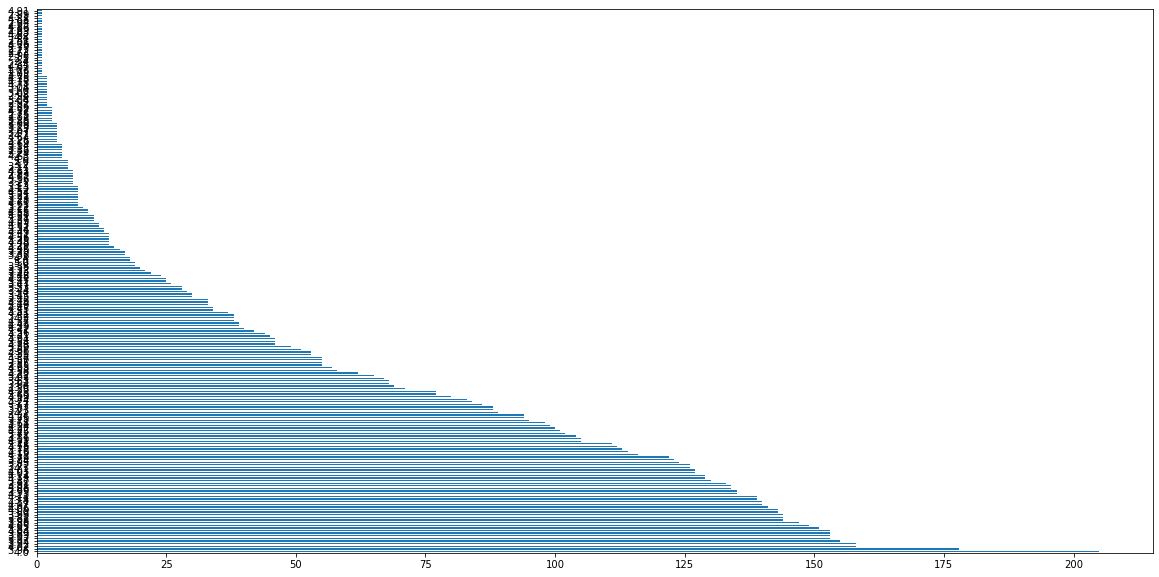

In [335]:
# Find how ratings are distributed
df['average_rating'].value_counts()
plt.figure(figsize=(20,10))
df['average_rating'].value_counts().plot(kind='barh')
#direct way using nunique() method applied to the Series
df['average_rating'].nunique() #too many unique values

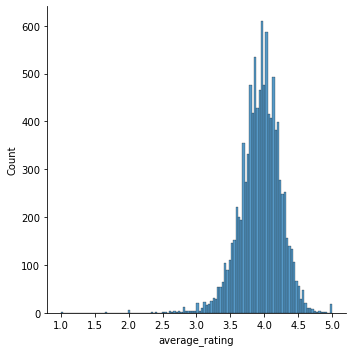

In [336]:
sns.displot(df.average_rating)

In [337]:
# Round values to max 1 decimal
df['avr_rating_rounded']=df['average_rating'].round(1)
df.head(3)
df['avr_rating_rounded'].nunique()

31

<AxesSubplot:>

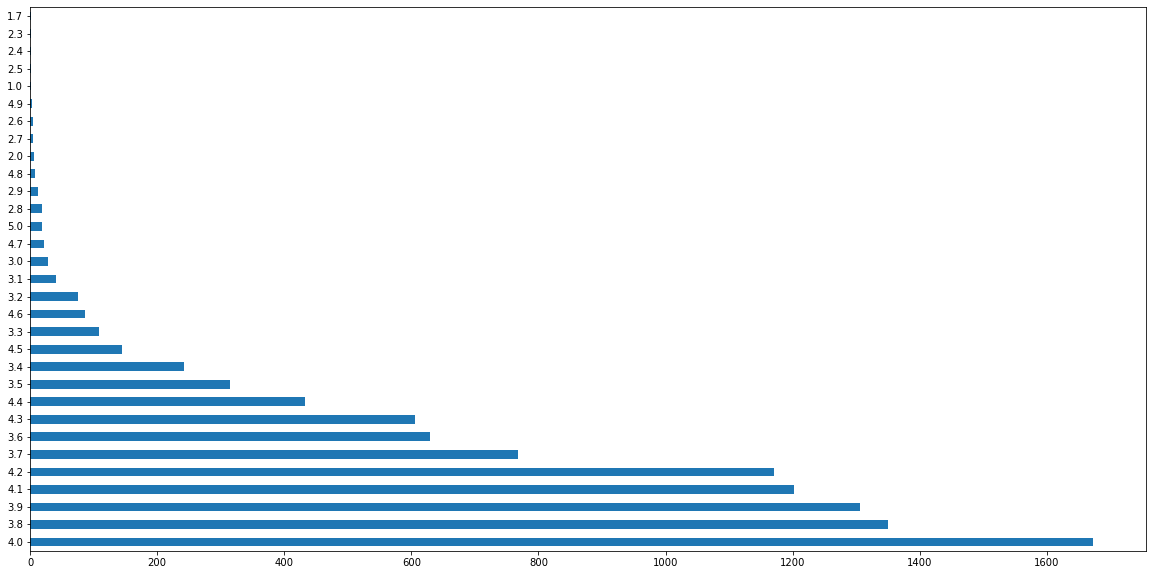

In [338]:
plt.figure(figsize=(20,10))
df['avr_rating_rounded'].value_counts().plot(kind='barh')

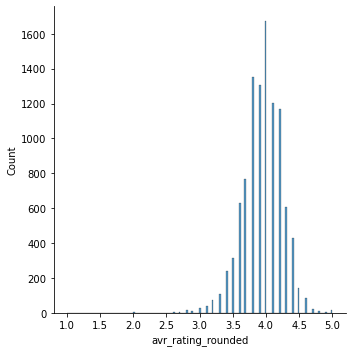

In [339]:
sns.displot(df.avr_rating_rounded)

In [340]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
slots_avrrating={1:'married', 2:'single', 3:'others',0:'unknown'}

In order to apply the transformation to the `marriage` Series, we combine the use of `apply()` method with a **lambda function**.

The lambda function takes in input a numeric value x and  returns the corresponding category.

In [ ]:
lambda x: marital_status[x]

In [ ]:
df['marriage'].apply(lambda x: marital_status[x])

The transformed Series can be assigned to a new Series called `marriage_new`

In [ ]:
df['marriage_new']=df['marriage'].apply(lambda x: marital_status[x])

- DONE - DATA CLEANING - Inspect dataset: check datatypes, missing values, describe data
- DONE - DATA CLEANING - Spaces before the title num_pages -> Remove them
- DONE - DATA CLEANING - Transform publication date into datetime format 
- DATA TRANSFORMATION - Rating count value 0 with an average vote <> 0 -> Transform rating count into categories : a bit, medium, a lot with log function -> Remove data

- DONE - DATA CLEANING - Too many authors (until 51) -> Keep only the first author who is the writer 'main_author' (individuato perchè è scritto prima della ',')
- DONE - DATA CLEANING - Duplicates? - Common titles with different lines -> Keep the max value and add the number of votes
- DONE - DATA CLEANING - Num pages with data 0 -> For 15 of them take the data of the identical book -> The rest, average by publisher
- DONE - DATA CLEANING - 4 lines discrepency between title and data -> Fix data with the right column	
- DONE - DATA CLEANING - Publication date -> Split by year -> Split by season into numerical

- DATA TRANSFORMATION - Language, author and publisher -> Transform in numerical data
- DATA TRANSFORMATION - Transform num pages into category (low, medium, high) -> classic spliting 
- DATA TRANSFORMATION - Transform rating into category (bad, medium, good) -> log function (important data : 91% of data between 3,5 and 4,4, lloks like a normal law)	

- ANALYSIS PART - Create a column average of rating vote -> average by author (keep this one but demonstrate we thought about the other option)	ponderate average by nb of votes

- ISBN13 et 10 -> Find a table equivalent for region/ country	

- AT THE END - Useless column (idbook) -> Delete
- AT THE END - Remove other useless or redundant colums
- AT THE END - Change the order of the columns of the table putting at the beginning those that are the key for prediction purposes then other columns by importance


In [ ]:
# Sort dataset by ID and Start Date (in this order)
df1=df1.sort_values(['User Sys ID', 'Start Date'], ascending=True)
df1.head(20)

In [ ]:
#compute the average job duration

jobnaids = df1[df1["Job Duration"].isna()]["User Sys ID"]
jobnaidsstats = jobnaids.value_counts(dropna = False)
jobnaidsstats


In [ ]:
#average number of skills for each employee
#how many skills for same ID
#count how many observation for the same unit
tmp = df4.groupby("User Sys ID").agg({"User Sys ID": "count"})
df4.set_index("User Sys ID", inplace=True)
df4["N. tech skills"] = tmp
df4.reset_index(inplace=True)

avg_tech_skills = df4['N. tech skills'].mean()
avg_tech_skills

mode_tech_skills = df4['N. tech skills'].mode()[0]
mode_tech_skills

#n. skills wrt average
#df4['Tech_skills vs avg'] = df4['N. tech skills'] / avg_tech_skills

#n. skills wrt mode
df4['Tech_skills vs mode'] = df4['N. tech skills'] / mode_tech_skills